#Prediction of Diabetes Risk Using Machine Learning Techniques

##1.Project Overview

This project aims to develop a predictive model that can accurately determine whether a patient has diabetes based on diagnostic measurements. The dataset used in this project is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. The primary objective is to leverage these measurements to predict the likelihood of diabetes in patients, specifically targeting females of at least 21 years of age who are of Pima Indian heritage.

The primary goal is to utilize the features to build a predictive model that can classify patients as diabetic or non-diabetic based on their diagnostic measurements. This model could serve as a valuable tool for early detection and intervention in diabetes management.

##2.Data Information

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data


- **Pregnancies**: Number of times the patient has been pregnant.
- **Glucose**: Plasma glucose concentration measured two hours after an oral glucose tolerance test.
- **BloodPressure**: Diastolic blood pressure (measured in mm Hg).
- **SkinThickness**: Triceps skin fold thickness (measured in mm).
- **Insulin**: 2-Hour serum insulin levels (measured in mu U/ml).
- **BMI**: Body mass index, calculated as weight in kg divided by height in meters squared.
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history.
- **Age**: The age of the patient in years.
- **Outcome**: The target variable indicating the presence (1) or absence (0) of diabetes.

##3.Data Inspecting and Preprocessing

In [ ]:
!pip install catboost

In [ ]:
!pip install logitboost

In [ ]:
!pip install dask[dataframe]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
# Loading the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check its rows and columns
df.shape

(768, 9)

In [ ]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Check its missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Check its duplication
df.duplicated().sum()

0

##4.Exploratory Data Analysis (EDA)

###Correlation Heatmap

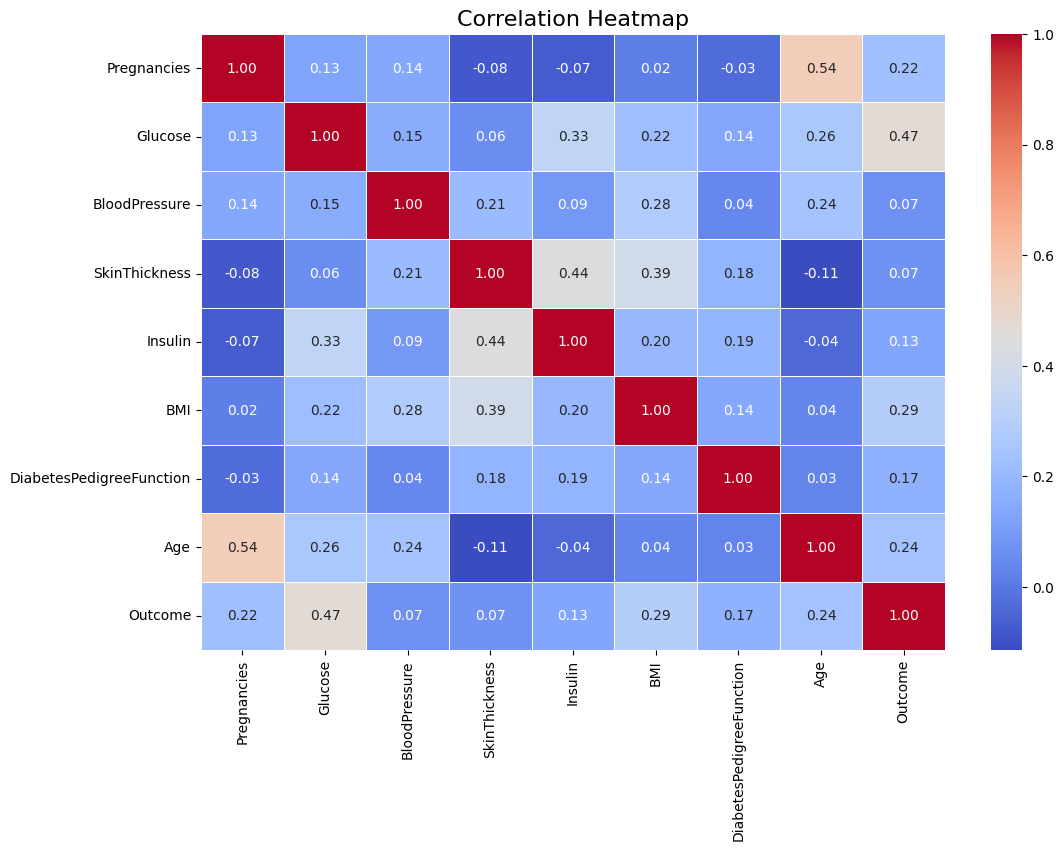

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

Key Correlations with the Target Variable (Outcome):

- **Glucose (0.47)**: Shows the highest positive correlation with the Outcome variable, indicating that higher glucose levels are associated with a higher likelihood of diabetes.
- **BMI (0.29)**: There is a moderate positive correlation between BMI and Outcome, suggesting that individuals with higher BMI might have a greater risk of diabetes.
- **Age (0.24)**: Age also shows a positive correlation, meaning that older individuals might be more likely to have diabetes.
- **Pregnancies (0.22)**: There is a positive correlation between the number of pregnancies and the likelihood of diabetes, although this correlation is weaker than that of Glucose, BMI, and Age.

Low or Negligible Correlations with Outcome:

- **BloodPressure (0.07)**, **SkinThickness (0.07)**, **Insulin (0.13)**, and **DiabetesPedigreeFunction (0.17)** all have low correlations with the Outcome variable, indicating that these features might not be as strongly associated with the presence of diabetes in this dataset.

Inter-Feature Correlations:

- **Age and Pregnancies (0.54)**: Age and the number of pregnancies have a relatively strong positive correlation, meaning that older individuals in the dataset tend to have had more pregnancies.
- **Glucose and Insulin (0.33)**: There is a moderate positive correlation between glucose and insulin levels, as expected, since both are related to blood sugar regulation.
- **SkinThickness and Insulin (0.44)**: A moderate positive correlation exists between skin thickness and insulin levels, possibly due to their relationship with body fat and metabolism.

Therefore, Glucose has the strongest positive correlation with the Outcome variable, followed by BMI, Age, and Pregnancies. These features are likely important predictors for diabetes in this dataset.Blood Pressure, Skin Thickness, Insulin, and Diabetes Pedigree Function have weaker correlations with the Outcome, indicating they might contribute less to predicting diabetes compared to the other features.

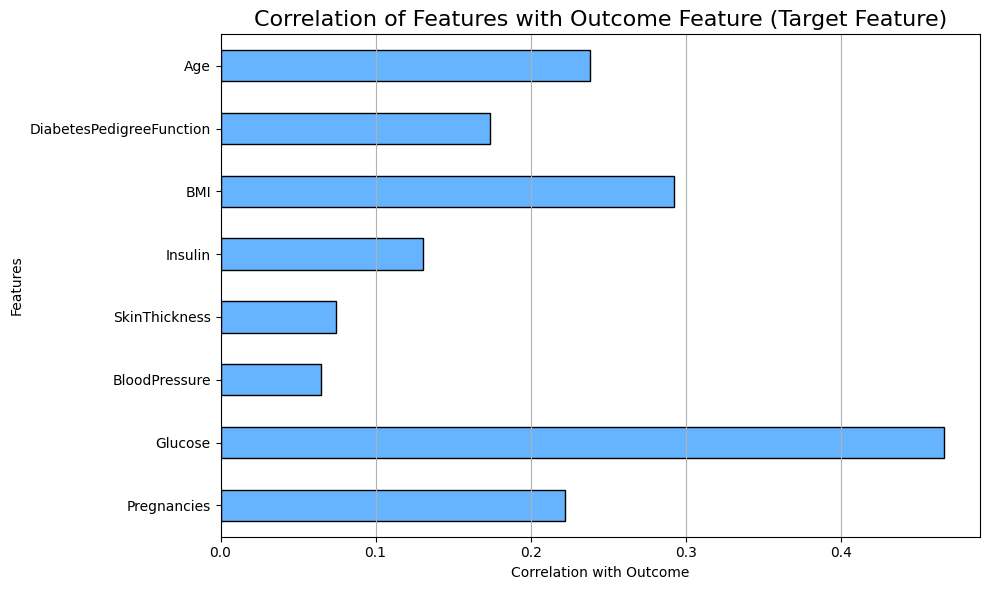

In [ ]:
import matplotlib.pyplot as plt

# Calculate the correlation between each feature and the target variable (Outcome)
correlations = df.corr()['Outcome'].drop('Outcome')

# Plotting the correlation as a horizontal bar chart
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='#66b3ff', edgecolor='black')

# Add labels and title
plt.title('Correlation of Features with Outcome Feature (Target Feature)', fontsize=16)
plt.xlabel('Correlation with Outcome')
plt.ylabel('Features')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

- **Most Significant Predictors:** **Glucose** is the most significant predictor of diabetes, followed by **BMI**, **Age**, and **Pregnancies**.
- **Moderately Significant:** **DiabetesPedigreeFunction** has some predictive power, though it is weaker than the above.
- **Low Significance:** **Insulin**, **SkinThickness**, and **BloodPressure** have very low correlations with the Outcome, suggesting they contribute minimally to predicting diabetes in this dataset.

###Outcome(Target Variable)

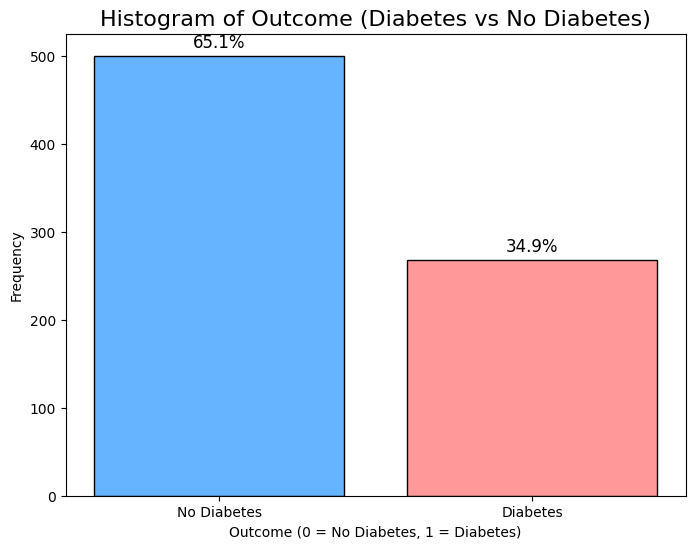

In [ ]:
import matplotlib.pyplot as plt

# Counting the occurrences of each outcome
outcome_counts = df['Outcome'].value_counts()

# Plotting a histogram for the Outcome variable with different colors
plt.figure(figsize=(8, 6))
bars = plt.bar(outcome_counts.index, outcome_counts, color=['#66b3ff', '#ff9999'], edgecolor='black')

# Adding percentages above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{(yval / len(df) * 100):.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('Histogram of Outcome (Diabetes vs No Diabetes)', fontsize=16)
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

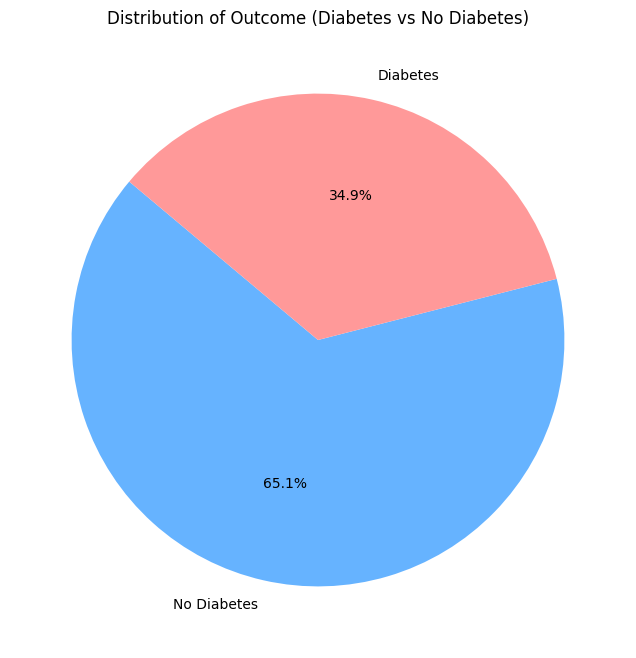

In [ ]:
# Plotting a pie chart for the Outcome variable
outcome_counts = df['Outcome'].value_counts()
outcome_labels = ['No Diabetes', 'Diabetes']

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Outcome (Diabetes vs No Diabetes)')
plt.show()

The majority class is No Diabetes (0), representing approximately 65.1% of the data, and the minority class is Diabetes (1), accounting for about 34.9% of the data. It means the dataset is somewhat imbalanced, with a higher proportion of individuals classified as not having diabetes compared to those who do have diabetes. This imbalance can impact the performance of machine learning models, as they may become biased toward the majority class (No Diabetes).



###Pregnancies

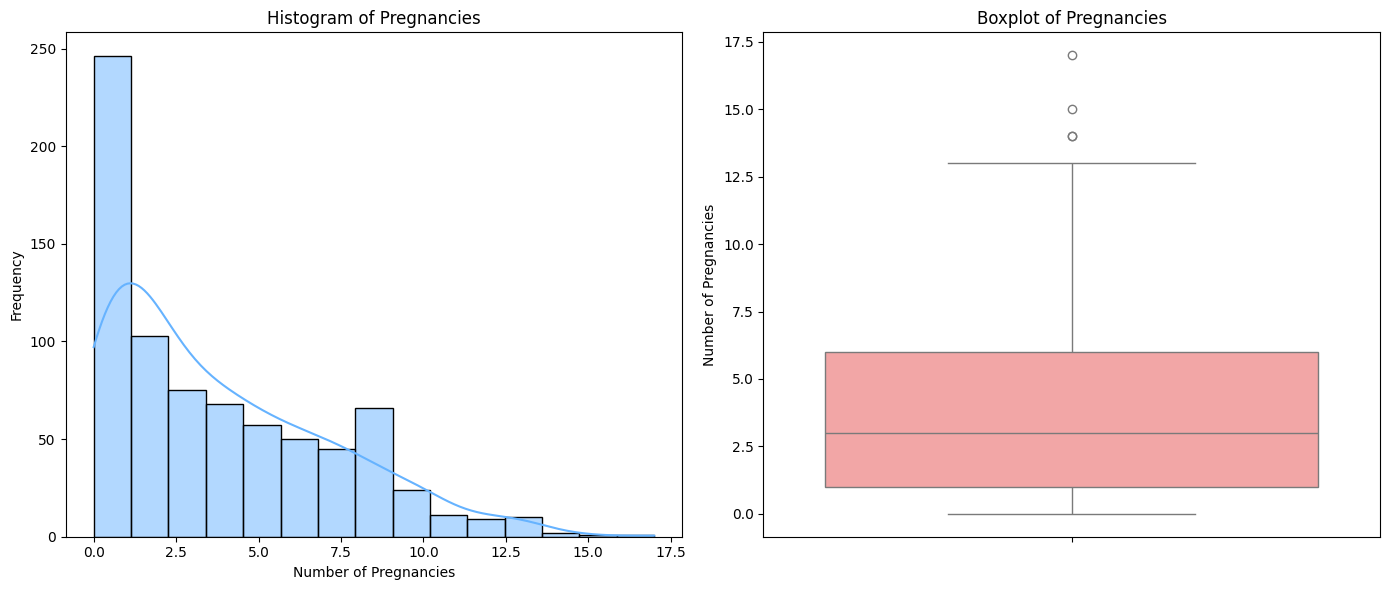

In [ ]:
# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Pregnancies
plt.subplot(1, 2, 1)
sns.histplot(df['Pregnancies'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

# Plotting the boxplot for Pregnancies
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Pregnancies'], color='#ff9999')
plt.title('Boxplot of Pregnancies')
plt.ylabel('Number of Pregnancies')

# Displaying the plots
plt.tight_layout()
plt.show()

The histogram displays the frequency of different numbers of pregnancies in the dataset. The distribution is heavily right-skewed, with most individuals having fewer pregnancies (0-2), and fewer individuals having higher numbers of pregnancies.

Therefore, the majority of the individuals in the dataset have had between 0 and 2 pregnancies. As the number of pregnancies increases, the frequency decreases significantly. This suggests that higher numbers of pregnancies are less common in this population.

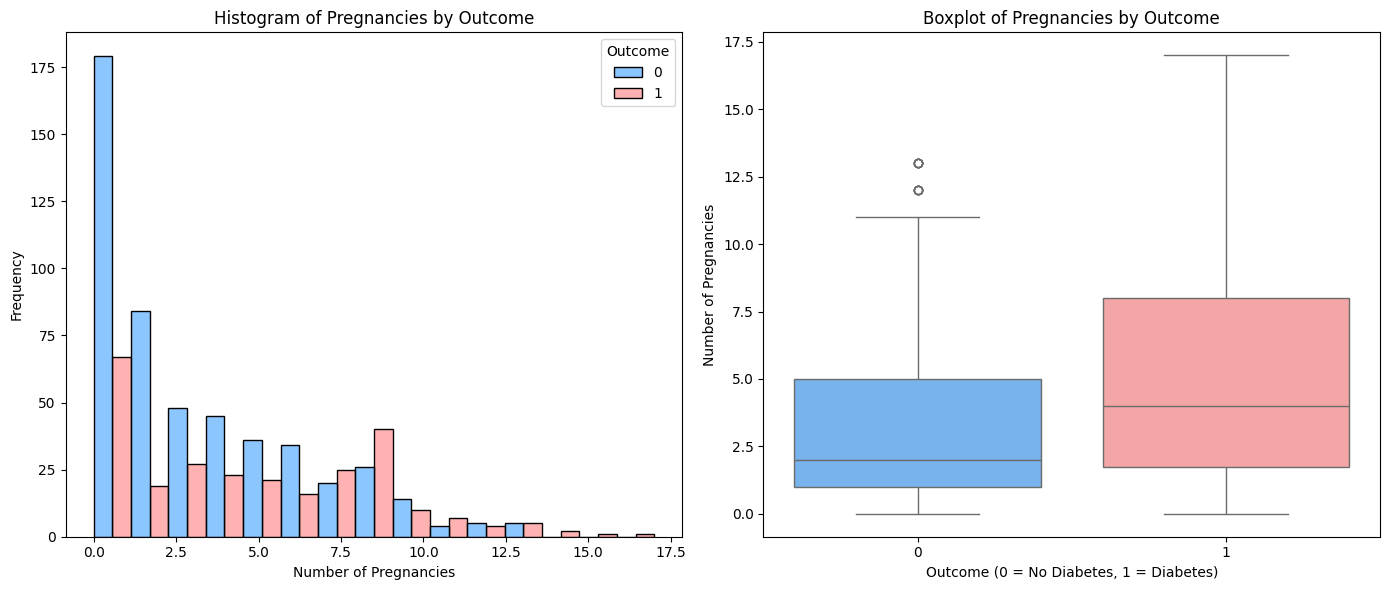

In [ ]:
# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Pregnancies vs. Outcome with dodge effect (side-by-side bars)
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Pregnancies', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

# Plotting the boxplot for Pregnancies vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Pregnancies', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Pregnancies by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Pregnancies')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'Pregnancies' column for each class of Outcome
pregnancies_stats_by_outcome = df.groupby('Outcome')['Pregnancies'].agg(['median', 'mean'])

pregnancies_stats_by_outcome

,median,mean
Outcome,,
0,2.0,3.298000
1,4.0,4.865672


As the number of pregnancies increases, the proportion of individuals with diabetes (Outcome = 1) increases relative to those without diabetes. Particularly for individuals with 7 or more pregnancies, there is a noticeable increase in the proportion of individuals with diabetes.

The median number of pregnancies is lower for individuals without diabetes compared to those with diabetes.The median for those without diabetes is around 2, while it’s higher for those with diabetes, approximately 4.



###Glucose

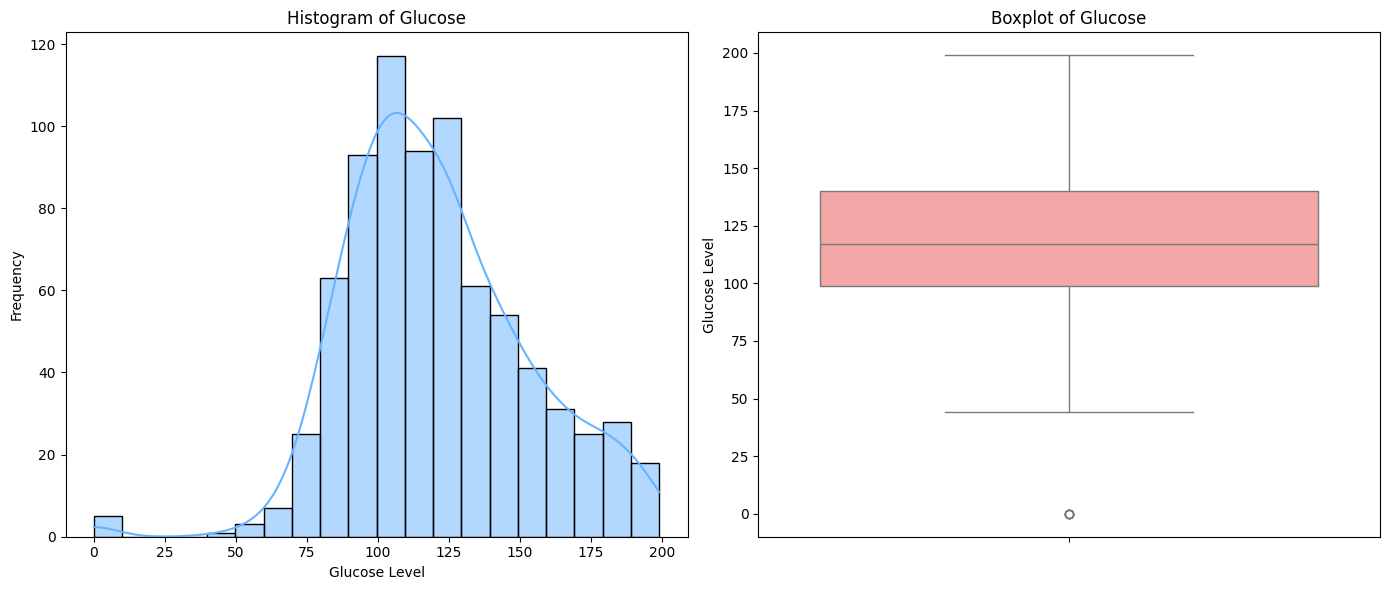

In [ ]:
# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Glucose
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=20, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plotting the boxplot for Glucose
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Glucose'], color='#ff9999')
plt.title('Boxplot of Glucose')
plt.ylabel('Glucose Level')

# Displaying the plots
plt.tight_layout()
plt.show()

The histogram and boxplot together suggest that glucose levels in this dataset are primarily concentrated around 100 to 125, with a right-skewed distribution indicating that higher glucose levels are less common.

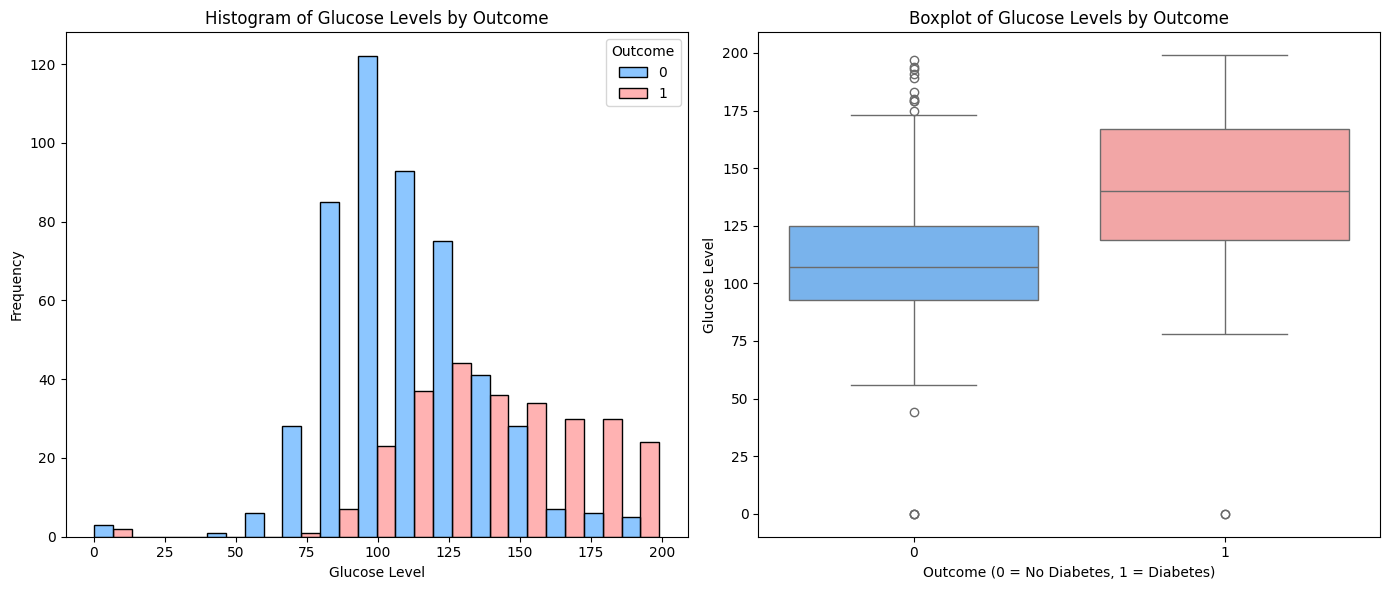

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Glucose vs. Outcome with 'dodge' for unstacked bars
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Glucose Levels by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plotting the boxplot for Glucose vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Glucose', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Glucose Levels by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Glucose Level')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'Glucose' column for each class of Outcome
glucose_stats_by_outcome = df.groupby('Outcome')['Glucose'].agg(['median', 'mean'])

glucose_stats_by_outcome

,median,mean
Outcome,,
0,107.0,109.980000
1,140.0,141.257463


Glucose levels are a strong indicator of diabetes. The histogram and boxplot clearly show that individuals with higher glucose levels are more likely to have diabetes (Outcome = 1), while lower glucose levels are more commonly associated with non-diabetic individuals (Outcome = 0).

The median glucose level for non-diabetic individuals is around 107, while for diabetic individuals, it's higher at approximately 140.

###BloodPressure

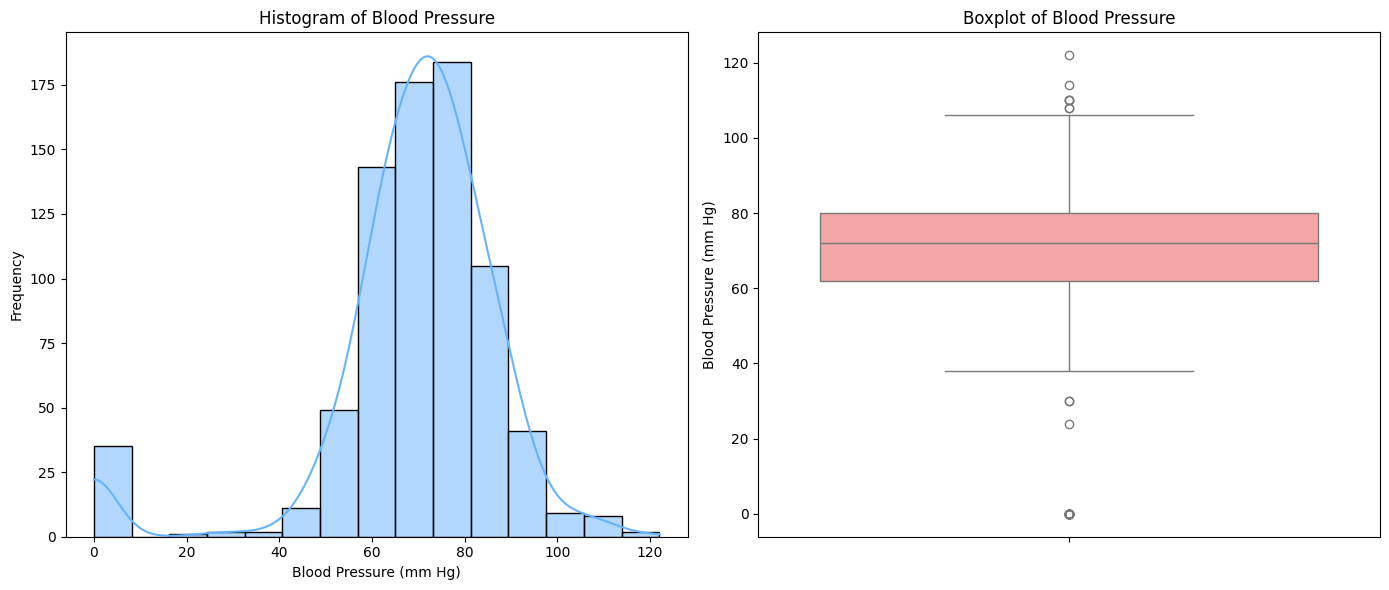

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['BloodPressure'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Blood Pressure')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

# Plotting the boxplot for Blood Pressure
plt.subplot(1, 2, 2)
sns.boxplot(y=df['BloodPressure'], color='#ff9999')
plt.title('Boxplot of Blood Pressure')
plt.ylabel('Blood Pressure (mm Hg)')

# Displaying the plots
plt.tight_layout()
plt.show()

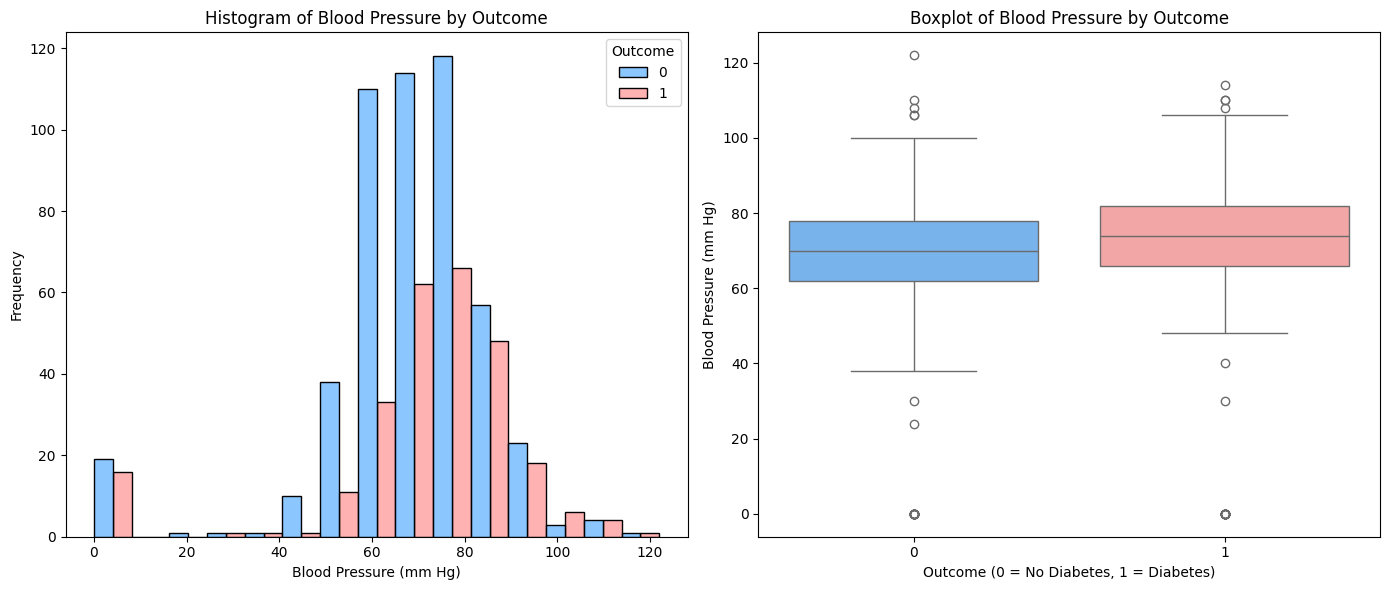

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Blood Pressure vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BloodPressure', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Blood Pressure by Outcome')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

# Plotting the boxplot for Blood Pressure vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Blood Pressure by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Blood Pressure (mm Hg)')

# Displaying the plots
plt.tight_layout()
plt.show()


In [ ]:
# Calculating the median and mean of the 'BloodPressure' column for each class of Outcome
bloodpressure_stats_by_outcome = df.groupby('Outcome')['BloodPressure'].agg(['median', 'mean'])

bloodpressure_stats_by_outcome

,median,mean
Outcome,,
0,70.0,68.184000
1,74.0,70.824627


The histogram shows that individuals without diabetes (Outcome = 0, in blue) tend to have slightly lower blood pressure levels, with the most common range being between 60 and 80 mm Hg.

Individuals with diabetes (Outcome = 1, in red) also have blood pressure levels primarily in the 60 to 80 mm Hg range, but there is a noticeable shift where a larger proportion of diabetic individuals have blood pressure readings closer to 80 mm Hg and above.


While there is a tendency for individuals with diabetes to have slightly higher blood pressure levels, the significant overlap between the two distributions suggests that blood pressure, by itself, may not be a strong standalone predictor of diabetes.

The slight shift in the distribution and the median suggests that blood pressure is associated with diabetes, but other factors likely play a more crucial role.

###SkinThickness

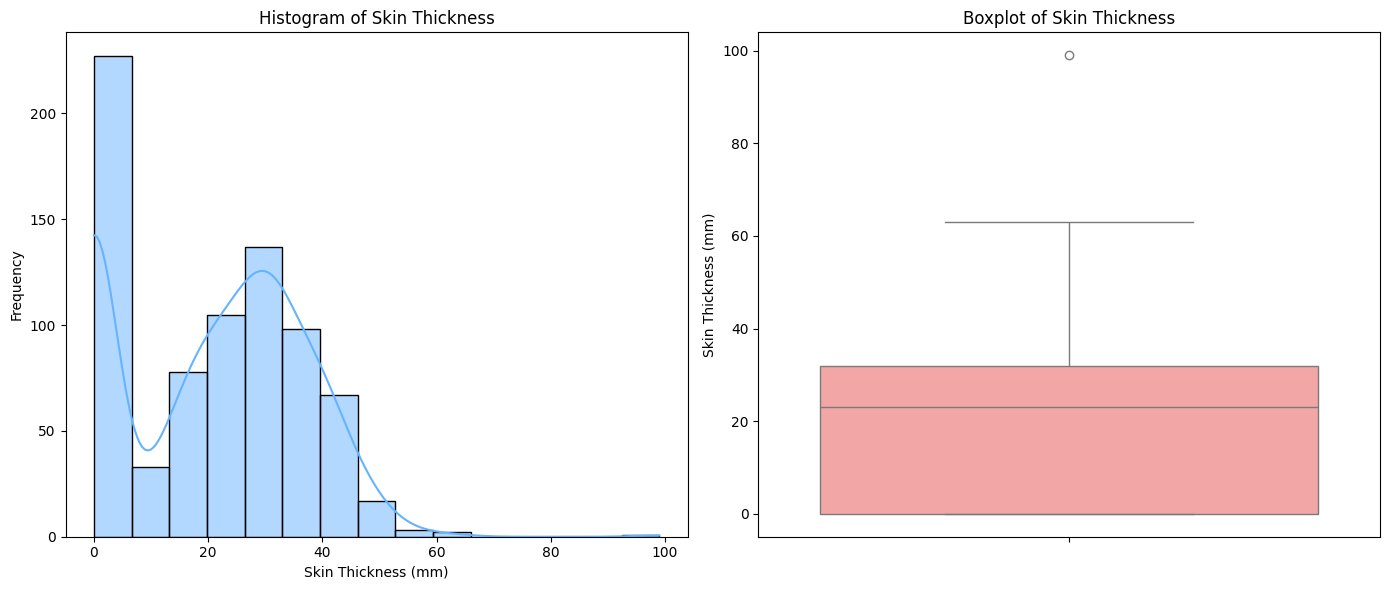

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for SkinThickness
plt.subplot(1, 2, 1)
sns.histplot(df['SkinThickness'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Skin Thickness')
plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Frequency')

# Plotting the boxplot for SkinThickness
plt.subplot(1, 2, 2)
sns.boxplot(y=df['SkinThickness'], color='#ff9999')
plt.title('Boxplot of Skin Thickness')
plt.ylabel('Skin Thickness (mm)')

# Displaying the plots
plt.tight_layout()
plt.show()

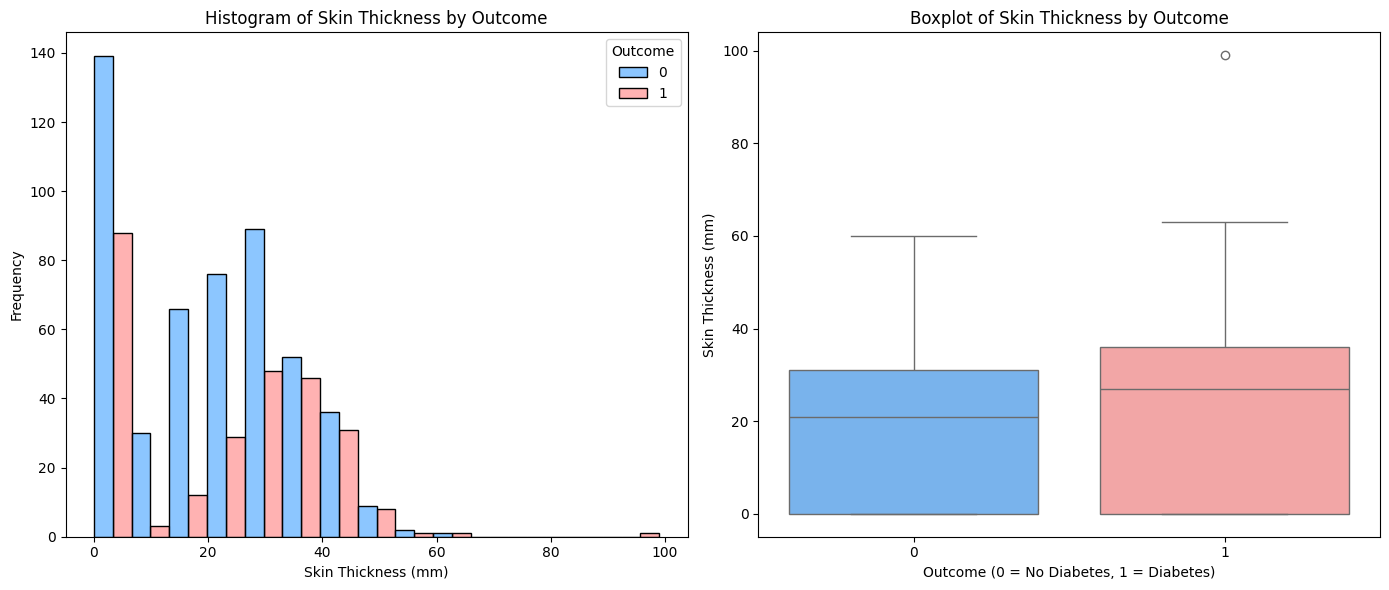

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for SkinThickness vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='SkinThickness', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Skin Thickness by Outcome')
plt.xlabel('Skin Thickness (mm)')
plt.ylabel('Frequency')

# Plotting the boxplot for SkinThickness vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='SkinThickness', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Skin Thickness by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Skin Thickness (mm)')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'SkinThickness' column for each class of Outcome
skin_thickness_stats_by_outcome = df.groupby('Outcome')['SkinThickness'].agg(['median', 'mean'])

skin_thickness_stats_by_outcome

,median,mean
Outcome,,
0,21.0,19.664000
1,27.0,22.164179


The histogram shows that individuals without diabetes (Outcome = 0, in blue) have a higher frequency of low skin thickness measurements, particularly around 0 to 20 mm.

Individuals with diabetes (Outcome = 1, in red) tend to have a slightly higher skin thickness, though the distributions of both groups overlap significantly.

The median skin thickness for individuals with diabetes (Outcome = 1) is slightly higher than for those without diabetes (Outcome = 0). This can be seen in the position of the median line inside each boxplot.

###Insulin

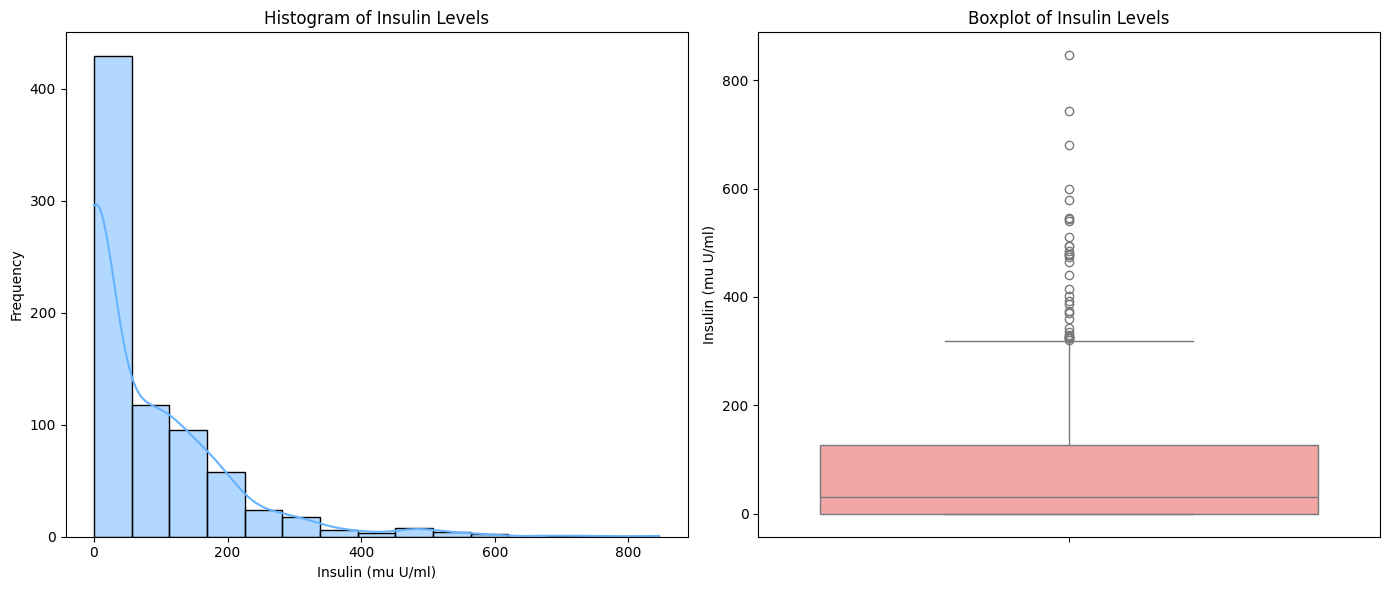

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Insulin
plt.subplot(1, 2, 1)
sns.histplot(df['Insulin'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Insulin Levels')
plt.xlabel('Insulin (mu U/ml)')
plt.ylabel('Frequency')

# Plotting the boxplot for Insulin
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Insulin'], color='#ff9999')
plt.title('Boxplot of Insulin Levels')
plt.ylabel('Insulin (mu U/ml)')

# Displaying the plots
plt.tight_layout()
plt.show()

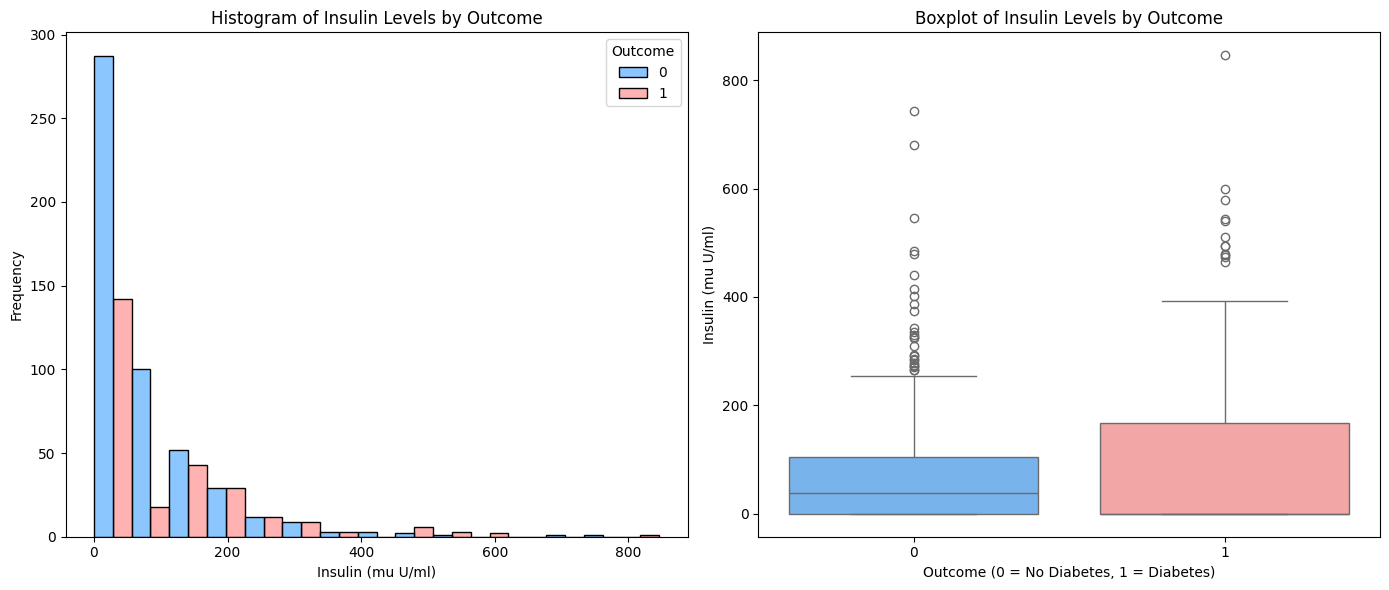

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Insulin vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Insulin', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Insulin Levels by Outcome')
plt.xlabel('Insulin (mu U/ml)')
plt.ylabel('Frequency')

# Plotting the boxplot for Insulin vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Insulin', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Insulin Levels by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Insulin (mu U/ml)')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'Insulin' column for each class of Outcome
insulin_stats_by_outcome = df.groupby('Outcome')['Insulin'].agg(['median', 'mean'])

insulin_stats_by_outcome

,median,mean
Outcome,,
0,39.0,68.792000
1,0.0,100.335821


The histogram shows that individuals without diabetes (Outcome = 0, in blue) have a higher frequency of low insulin levels, particularly around 0 to 100 mu U/ml.

Individuals with diabetes (Outcome = 1, in red) also tend to have low insulin levels, but there is a noticeable increase in the frequency of higher insulin levels (above 100 mu U/ml) compared to non-diabetic individuals.

The median insulin level is higher for individuals with diabetes (Outcome = 1) compared to those without diabetes (Outcome = 0). It means that higher insulin levels are more common among individuals with diabetes, as shown by the shift in the histogram and the higher median in the boxplot.

###BMI

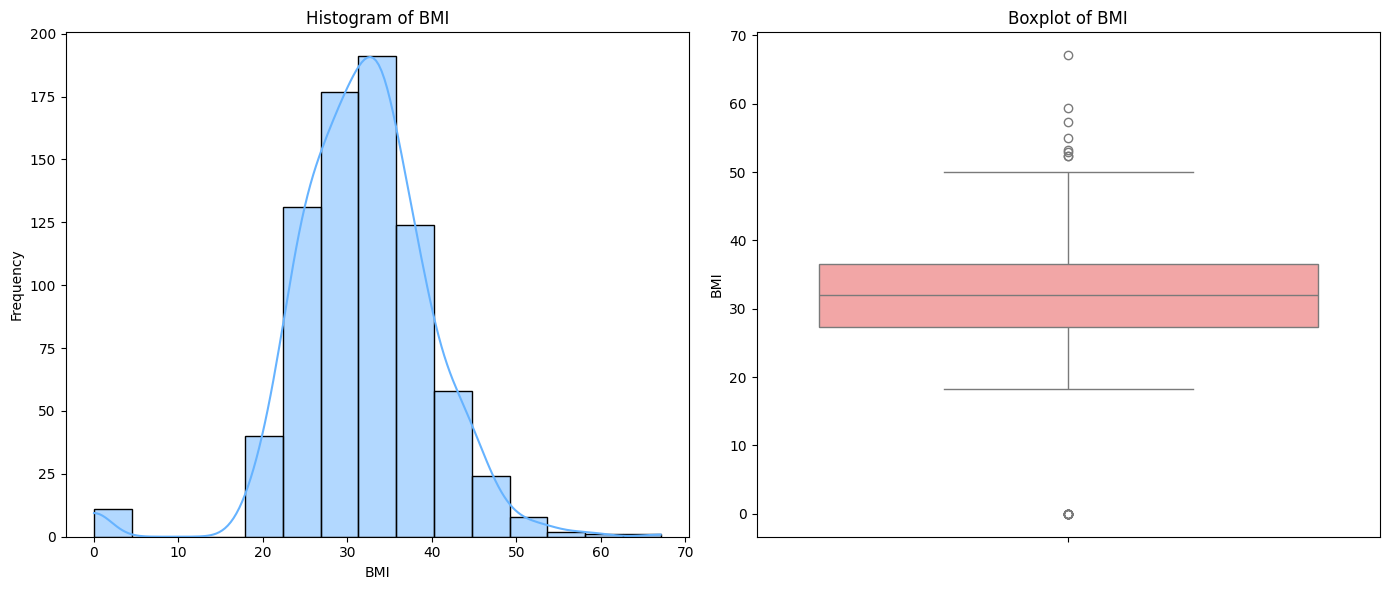

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for BMI
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plotting the boxplot for BMI
plt.subplot(1, 2, 2)
sns.boxplot(y=df['BMI'], color='#ff9999')
plt.title('Boxplot of BMI')
plt.ylabel('BMI')

# Displaying the plots
plt.tight_layout()
plt.show()

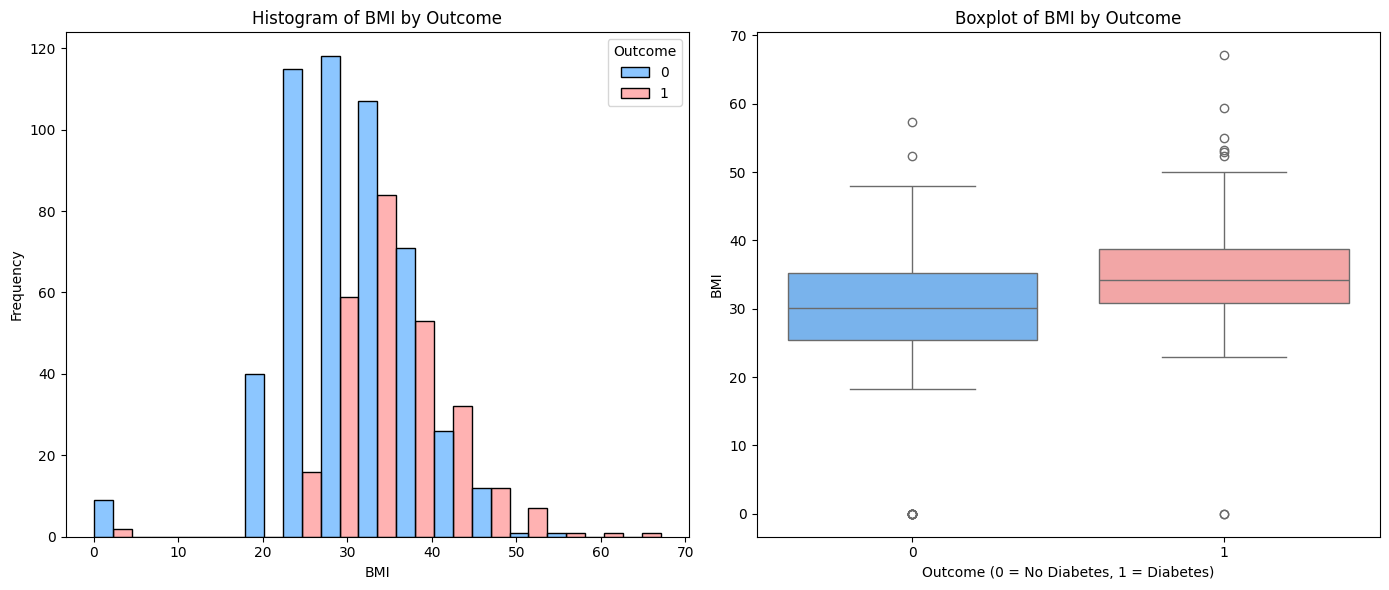

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for BMI vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BMI', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of BMI by Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plotting the boxplot for BMI vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='BMI', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of BMI by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'BMI' column for each class of Outcome
bmi_stats_by_outcome = df.groupby('Outcome')['BMI'].agg(['median', 'mean'])

bmi_stats_by_outcome

,median,mean
Outcome,,
0,30.05,30.304200
1,34.25,35.142537


The histogram shows that individuals without diabetes (Outcome = 0, in blue) have a higher frequency of BMI values between 25 and 35.
Individuals with diabetes (Outcome = 1, in red) also show a high frequency in this BMI range, but there is a noticeable shift towards higher BMI values, particularly between 35 and 45.

The histogram and boxplot together suggest that higher BMI values are more common among individuals with diabetes. The shift towards higher BMI values in the diabetic group, along with a higher median BMI, indicates that BMI is associated with diabetes.

###DiabetesPedigreeFunction

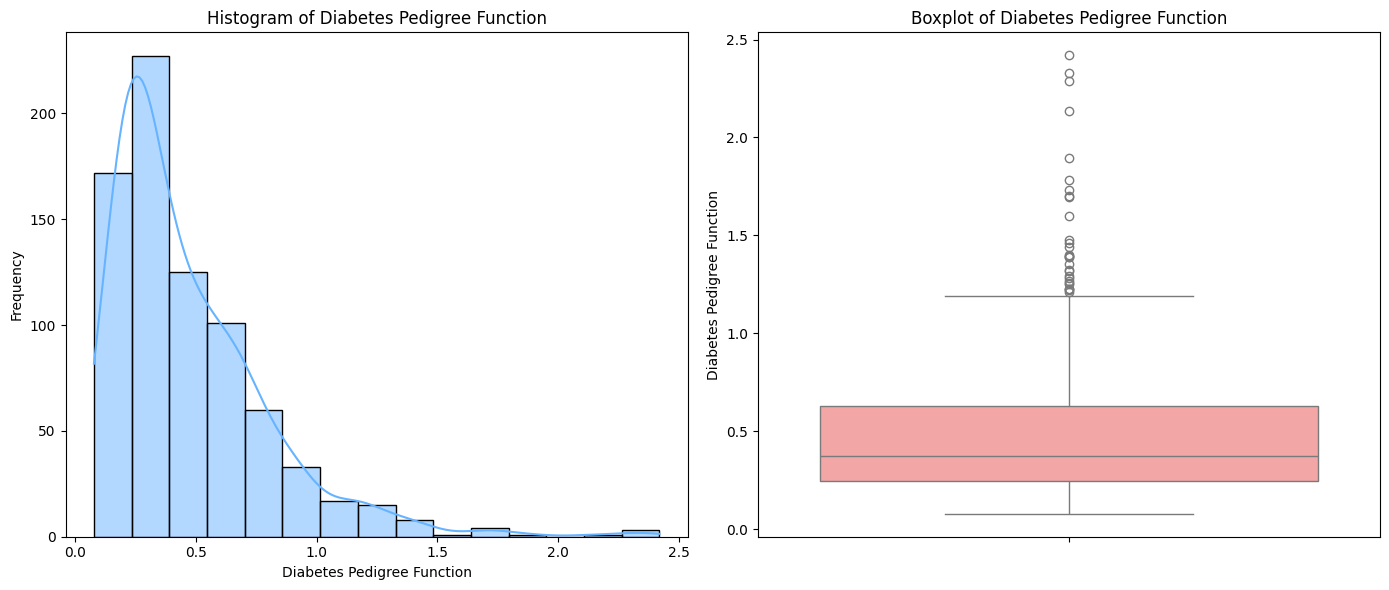

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for DiabetesPedigreeFunction
plt.subplot(1, 2, 1)
sns.histplot(df['DiabetesPedigreeFunction'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')

# Plotting the boxplot for DiabetesPedigreeFunction
plt.subplot(1, 2, 2)
sns.boxplot(y=df['DiabetesPedigreeFunction'], color='#ff9999')
plt.title('Boxplot of Diabetes Pedigree Function')
plt.ylabel('Diabetes Pedigree Function')

# Displaying the plots
plt.tight_layout()
plt.show()

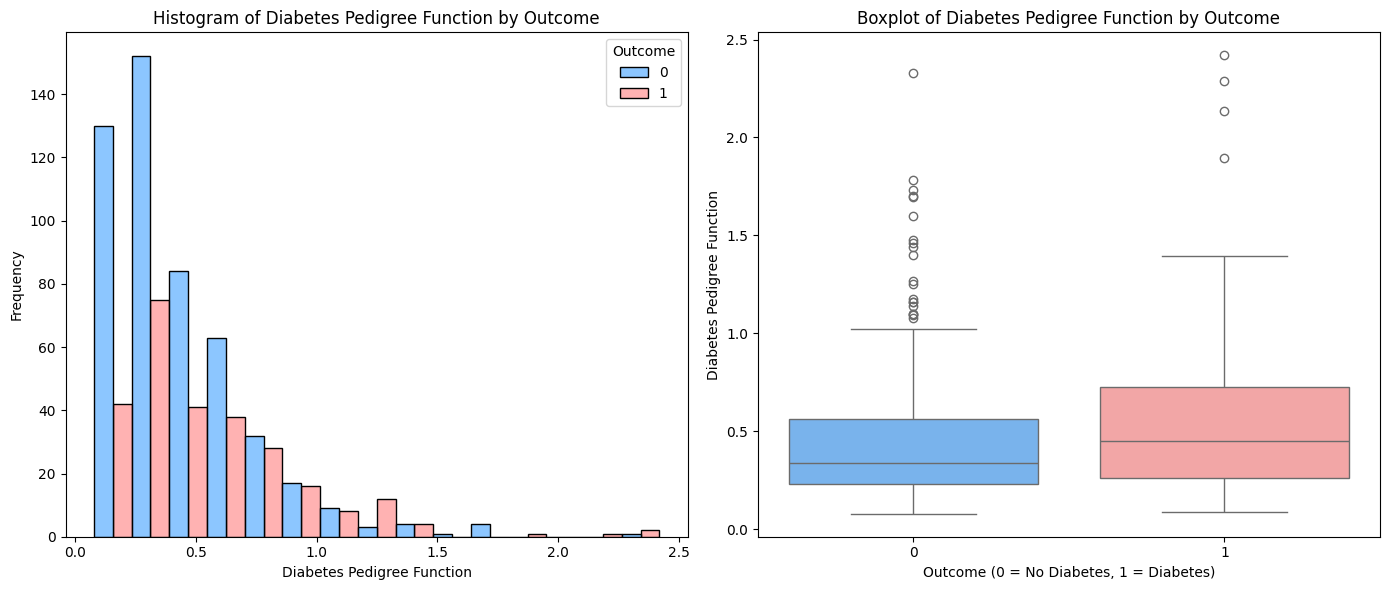

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for DiabetesPedigreeFunction vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Diabetes Pedigree Function by Outcome')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')

# Plotting the boxplot for DiabetesPedigreeFunction vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='DiabetesPedigreeFunction', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Diabetes Pedigree Function by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Diabetes Pedigree Function')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'DiabetesPedigreeFunction' column for each class of Outcome
dpf_stats_by_outcome = df.groupby('Outcome')['DiabetesPedigreeFunction'].agg(['median', 'mean'])

dpf_stats_by_outcome

,median,mean
Outcome,,
0,0.336,0.429734
1,0.449,0.550500


The histogram shows that individuals without diabetes (Outcome = 0, in blue) have a higher frequency of lower DPF values, particularly below 0.5.

Individuals with diabetes (Outcome = 1, in red) tend to have slightly higher DPF values, with more individuals having DPF values between 0.5 and 1.0 compared to those without diabetes.


The median DPF value is higher for individuals with diabetes (Outcome = 1) compared to those without diabetes (Outcome = 0).

Therefore, the higher DPF values are more common among individuals with diabetes, as shown by the shift in the histogram and the higher median in the boxplot.

###Age

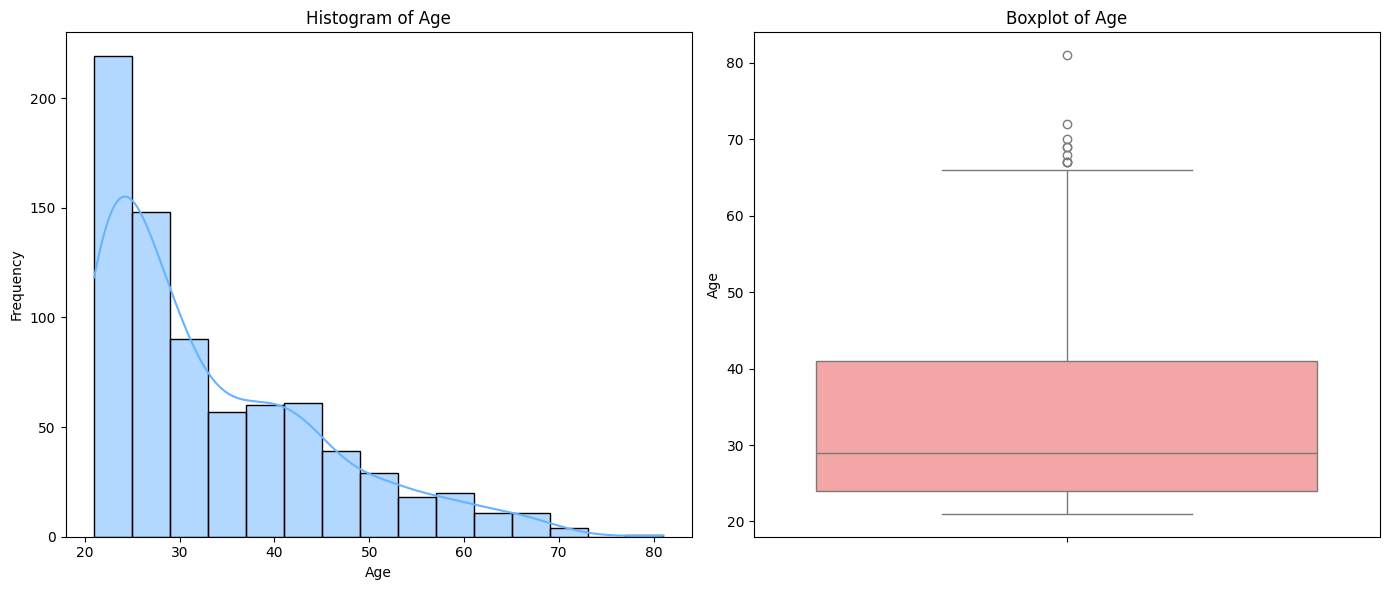

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='#66b3ff', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'], color='#ff9999')
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Displaying the plots
plt.tight_layout()
plt.show()

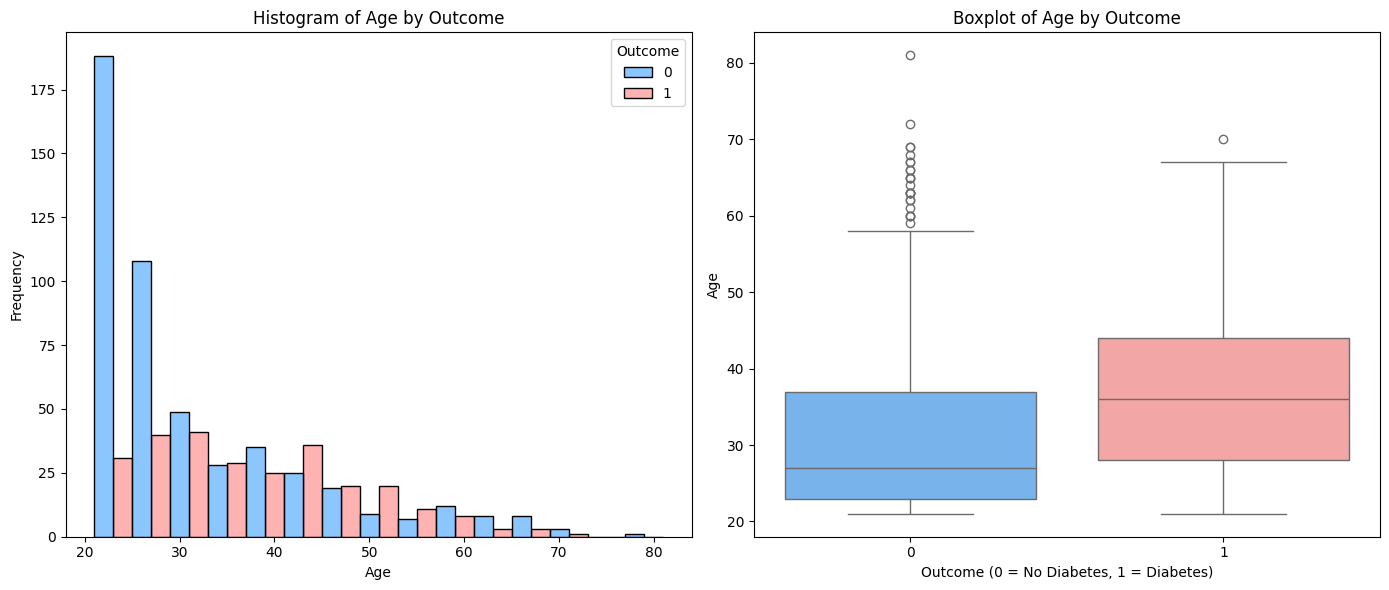

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Plotting the histogram for Age vs. Outcome
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Outcome', multiple='dodge', bins=15, palette=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Histogram of Age by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the boxplot for Age vs. Outcome
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Age', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot of Age by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Age')

# Displaying the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the median and mean of the 'Age' column for each class of Outcome
age_stats_by_outcome = df.groupby('Outcome')['Age'].agg(['median', 'mean'])

age_stats_by_outcome

,median,mean
Outcome,,
0,27.0,31.190000
1,36.0,37.067164


The histogram shows that individuals without diabetes (Outcome = 0, in blue) are predominantly younger, with a peak in the 20-30 age range. This group has a significantly higher frequency in the younger age brackets.

Individuals with diabetes (Outcome = 1, in red) are more evenly distributed across the age ranges, with a noticeable presence in the 40-60 age range. The frequency of diabetes increases with age.

The median age for individuals with diabetes (Outcome = 1) is higher compared to those without diabetes (Outcome = 0).

The histogram and boxplot together indicate that older age is more strongly associated with diabetes. The diabetic group is skewed towards older ages, and the median age is significantly higher for those with diabetes.

##5.Predictive Modeling

###Model Training

####Data Preparating

In [ ]:
# Separating features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler to transform the test set

####Model Selection and Training

In [ ]:
# List of models to train, including SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(verbose=0, random_state=42),
    "LogitBoost": LogitBoost(),
    "SVC": SVC(probability=True, random_state=42)  # SVC added to the model list
}

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        predictions[name] = y_pred

        print(f"{name} results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}\n")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {name}')
        plt.legend(loc='lower right')
        plt.show()

    return results, predictions

###Model Evaluation

Logistic Regression results:
Accuracy: 0.7532
Precision: 0.7308
Recall: 0.7390
F1 Score: 0.7341



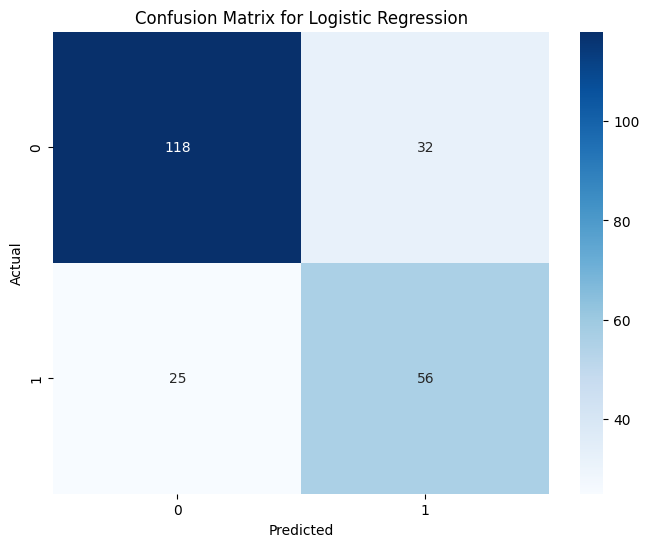

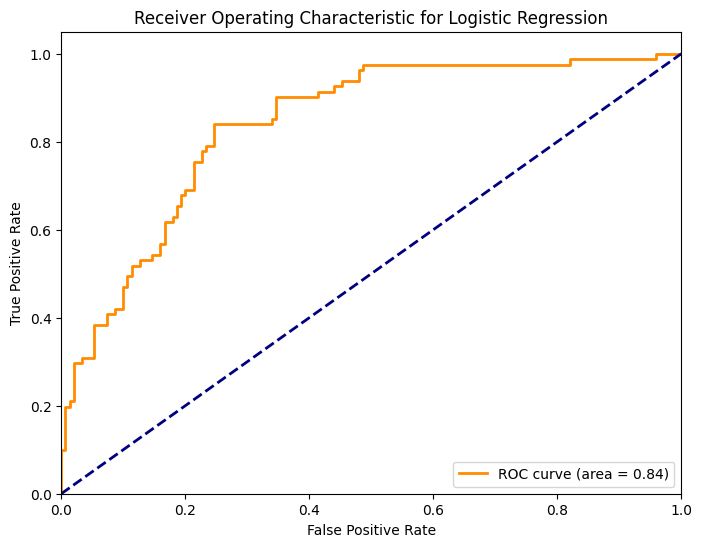

Decision Tree results:
Accuracy: 0.7403
Precision: 0.7145
Recall: 0.7120
F1 Score: 0.7132



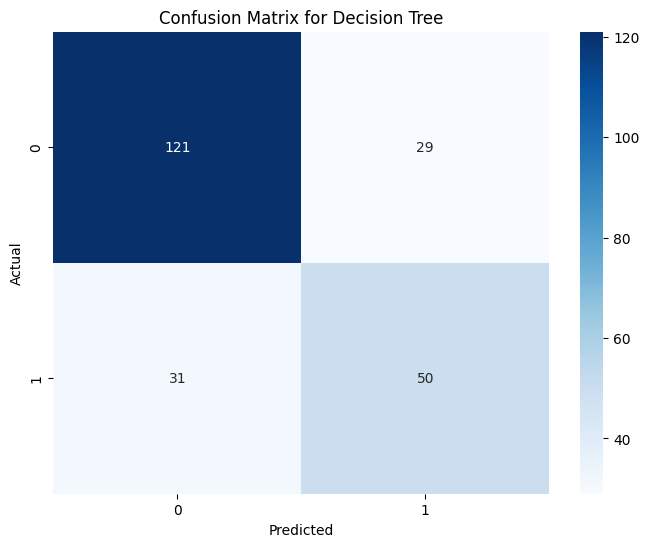

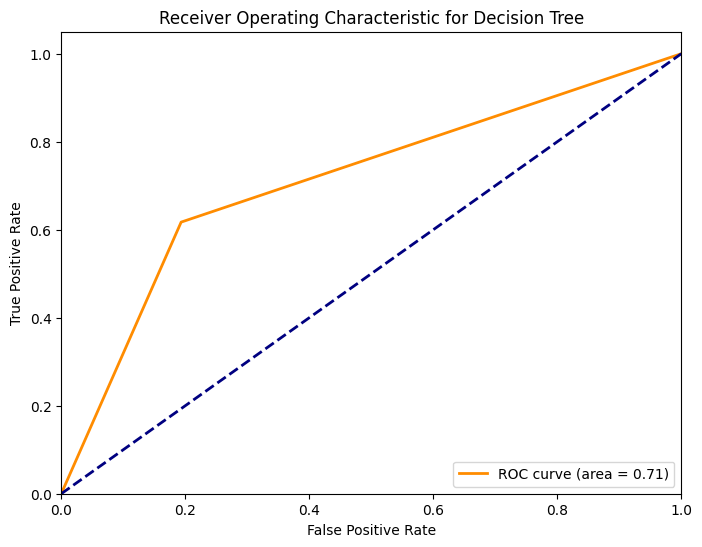

Random Forest results:
Accuracy: 0.7662
Precision: 0.7433
Recall: 0.7405
F1 Score: 0.7418



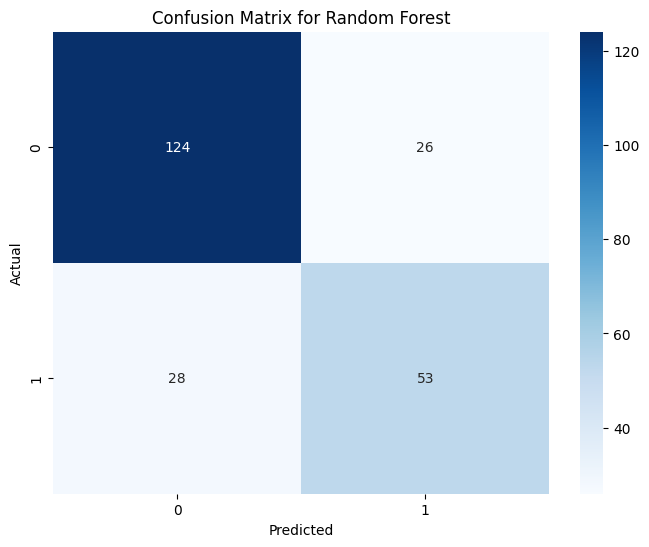

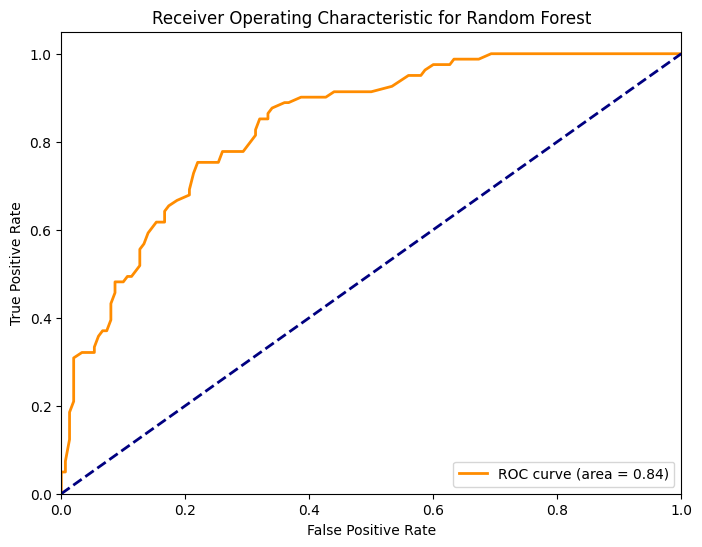

AdaBoost results:
Accuracy: 0.7706
Precision: 0.7481
Recall: 0.7467
F1 Score: 0.7474



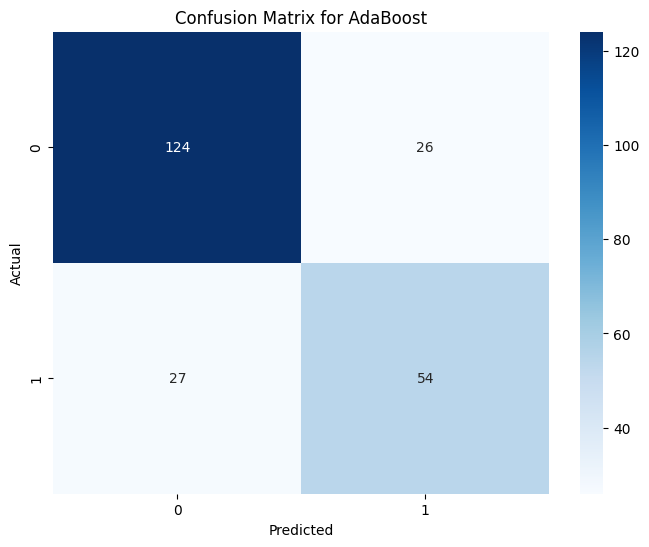

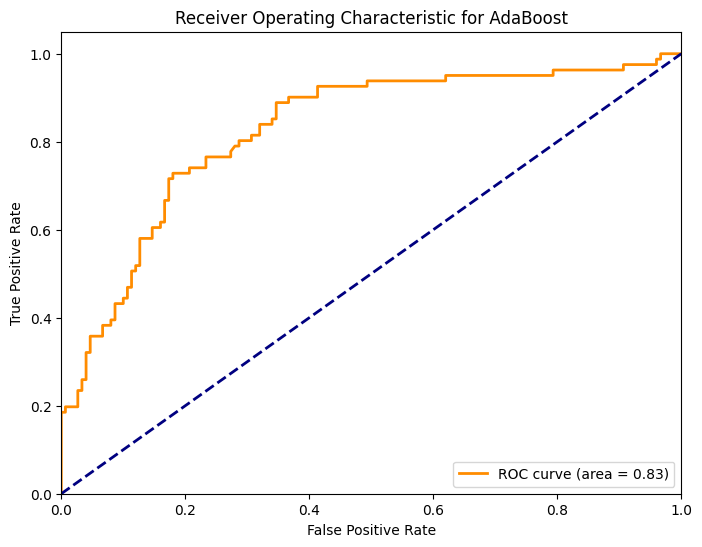

Gradient Boosting results:
Accuracy: 0.7662
Precision: 0.7433
Recall: 0.7433
F1 Score: 0.7433



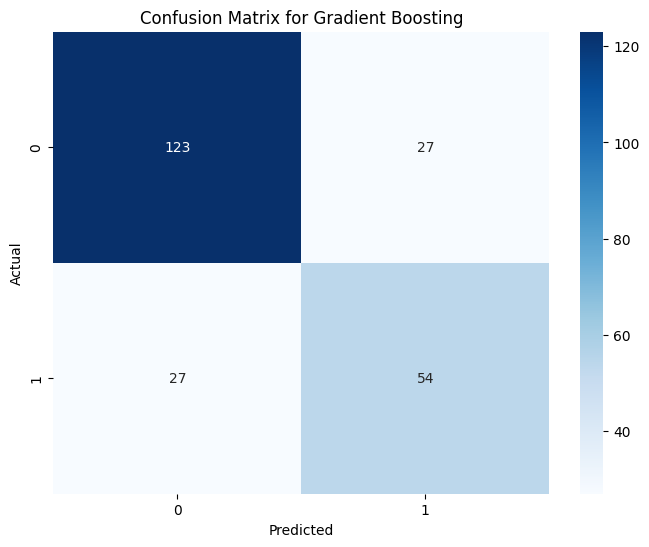

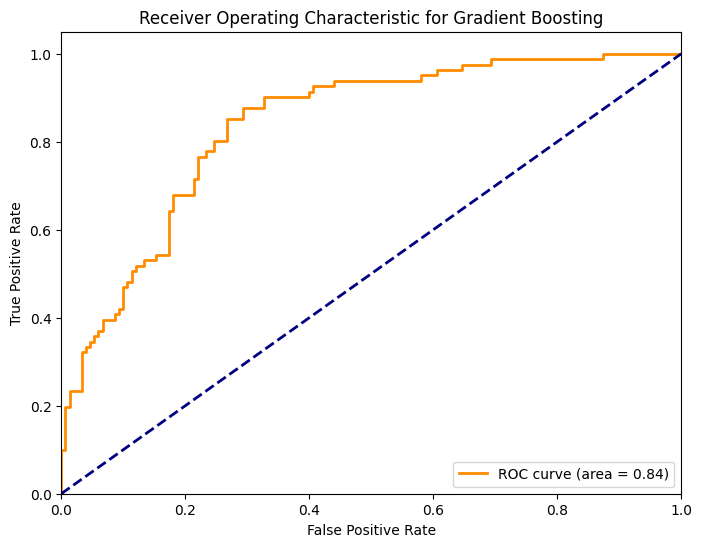

XGBoost results:
Accuracy: 0.7532
Precision: 0.7289
Recall: 0.7248
F1 Score: 0.7267



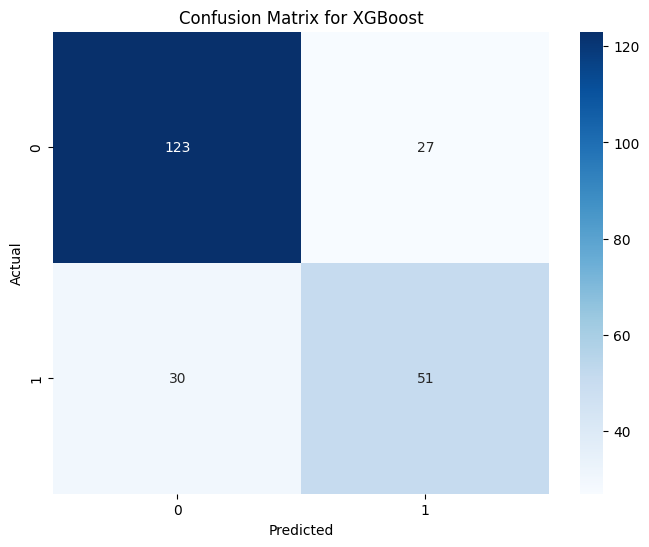

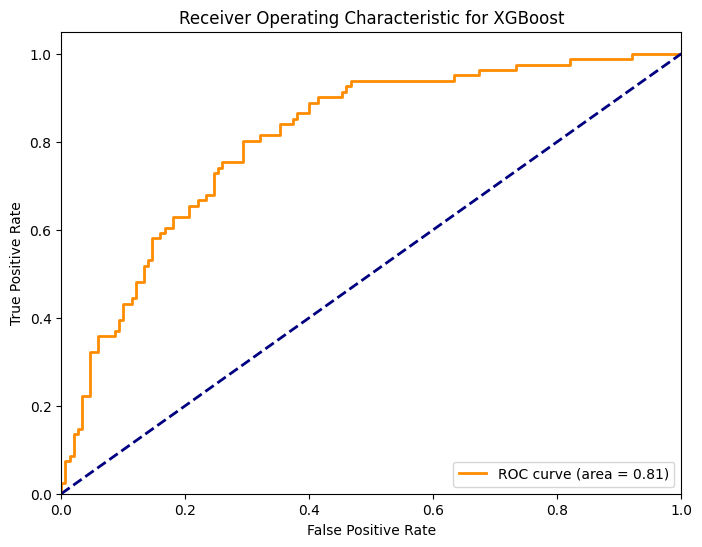

[LightGBM] [Info] Number of positive: 350, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

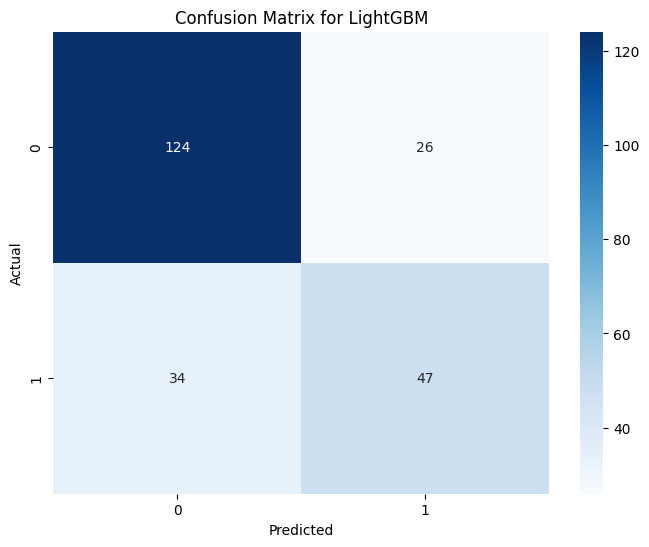

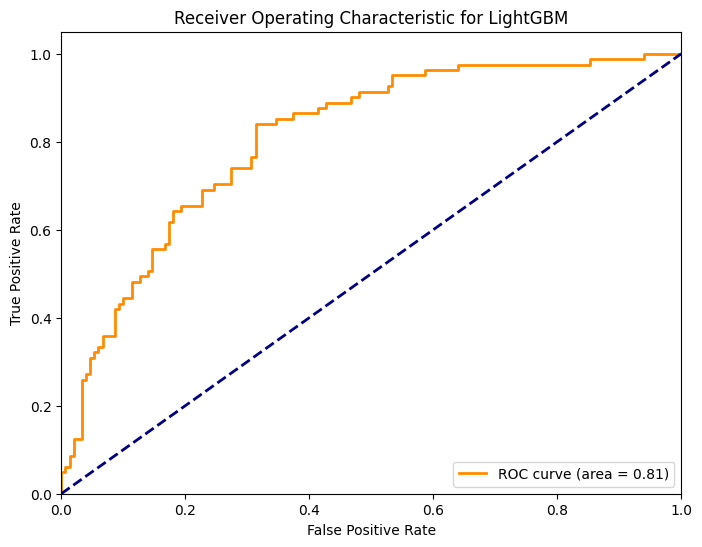

CatBoost results:
Accuracy: 0.7576
Precision: 0.7337
Recall: 0.7310
F1 Score: 0.7323



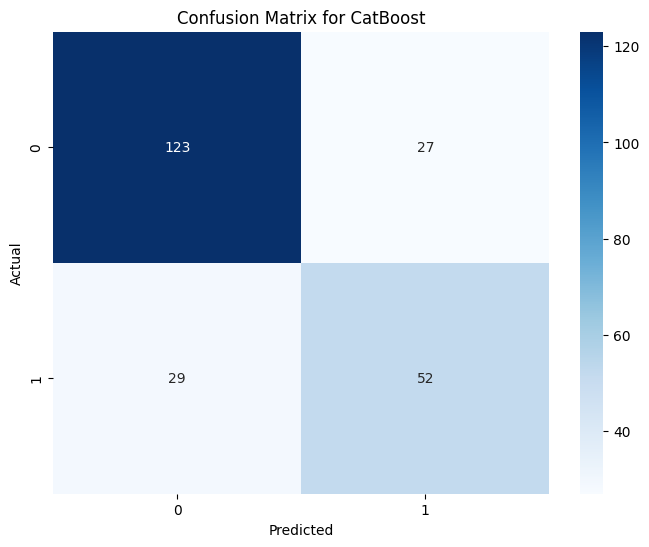

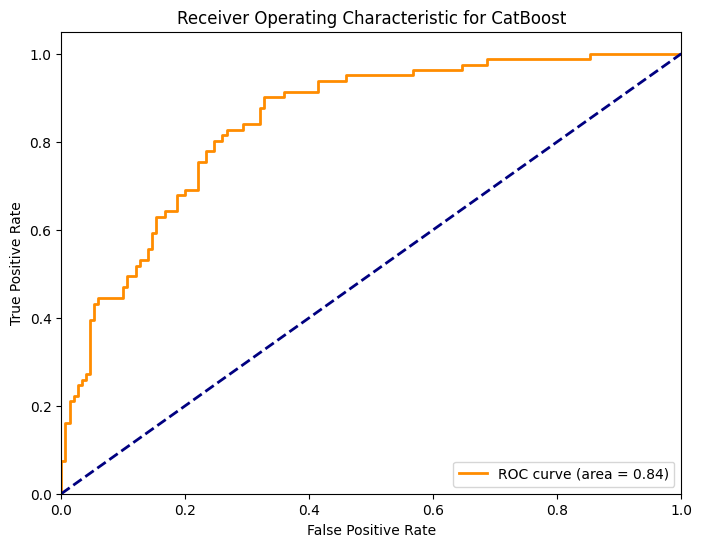

LogitBoost results:
Accuracy: 0.7619
Precision: 0.7389
Recall: 0.7428
F1 Score: 0.7407



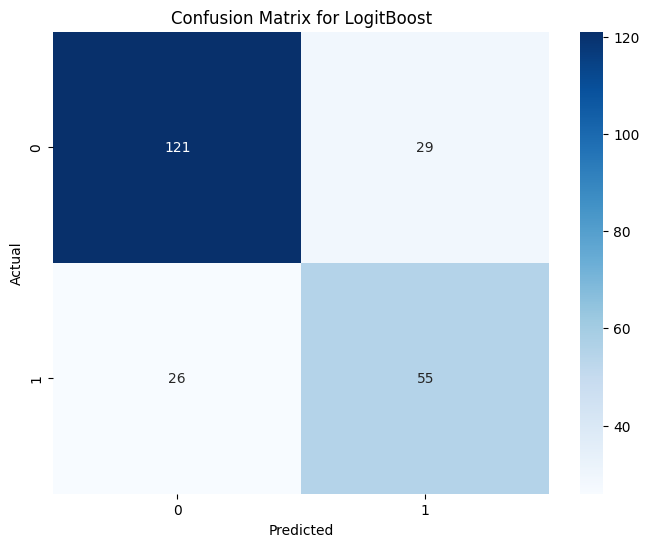

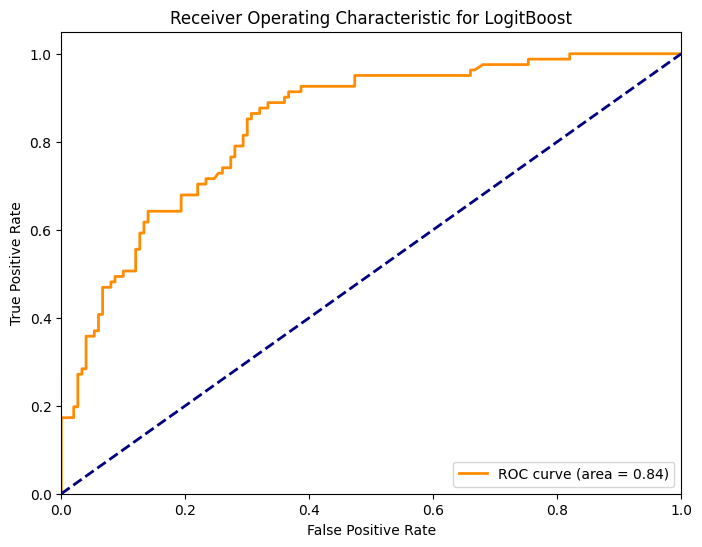

SVC results:
Accuracy: 0.7489
Precision: 0.7285
Recall: 0.7414
F1 Score: 0.7326



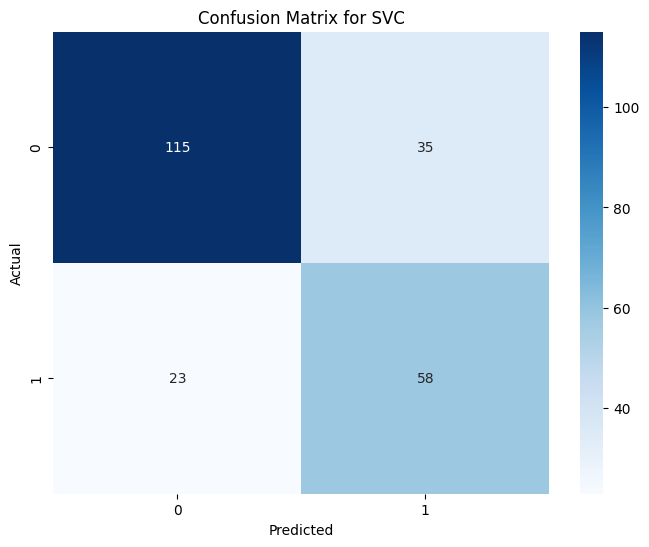

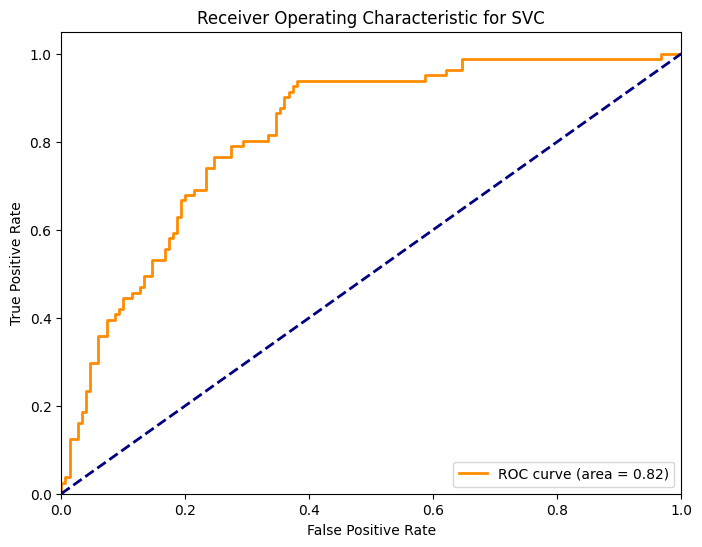

In [ ]:
# Train and evaluate the models
results, predictions = train_and_evaluate(models, X_train, X_test, y_train, y_test)

In [ ]:
# Display results in a table format
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest,AdaBoost,Gradient Boosting,XGBoost,LightGBM,CatBoost,LogitBoost,SVC
accuracy,0.753247,0.740260,0.766234,0.770563,0.766234,0.753247,0.740260,0.757576,0.761905,0.748918
precision,0.730769,0.714482,0.743338,0.748096,0.743333,0.728884,0.714323,0.733719,0.738946,0.728495
recall,0.739012,0.711975,0.740494,0.746667,0.743333,0.724815,0.703457,0.730988,0.742840,0.741358
f1_score,0.734091,0.713162,0.741846,0.747364,0.743333,0.726695,0.707792,0.732285,0.740741,0.732639


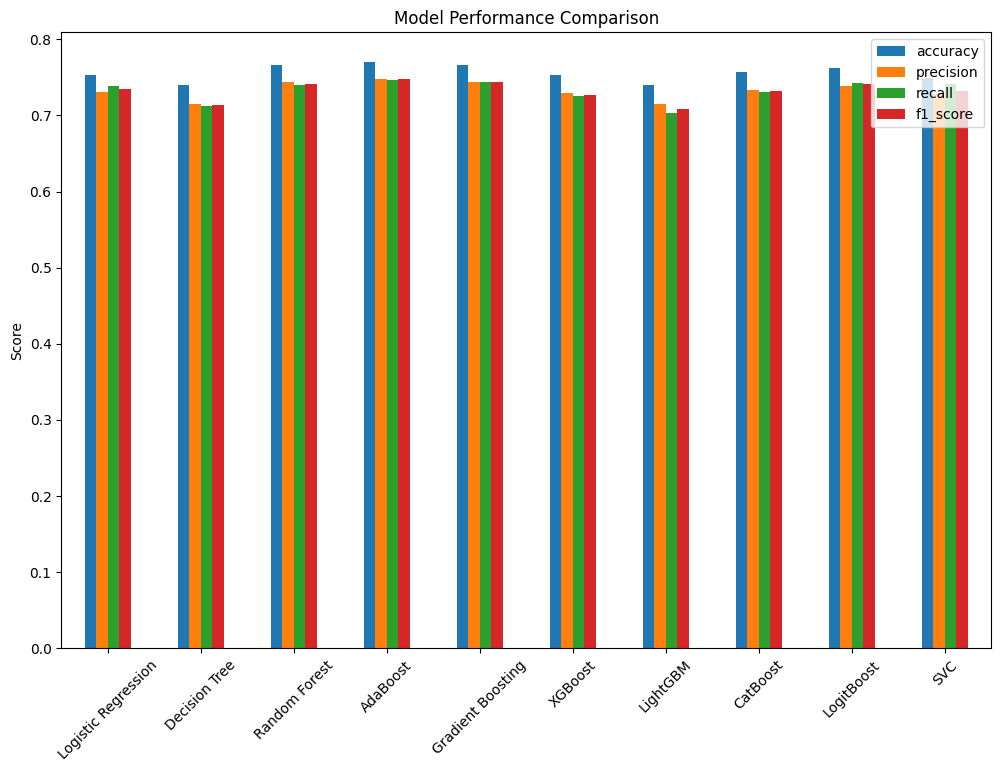

In [ ]:
# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

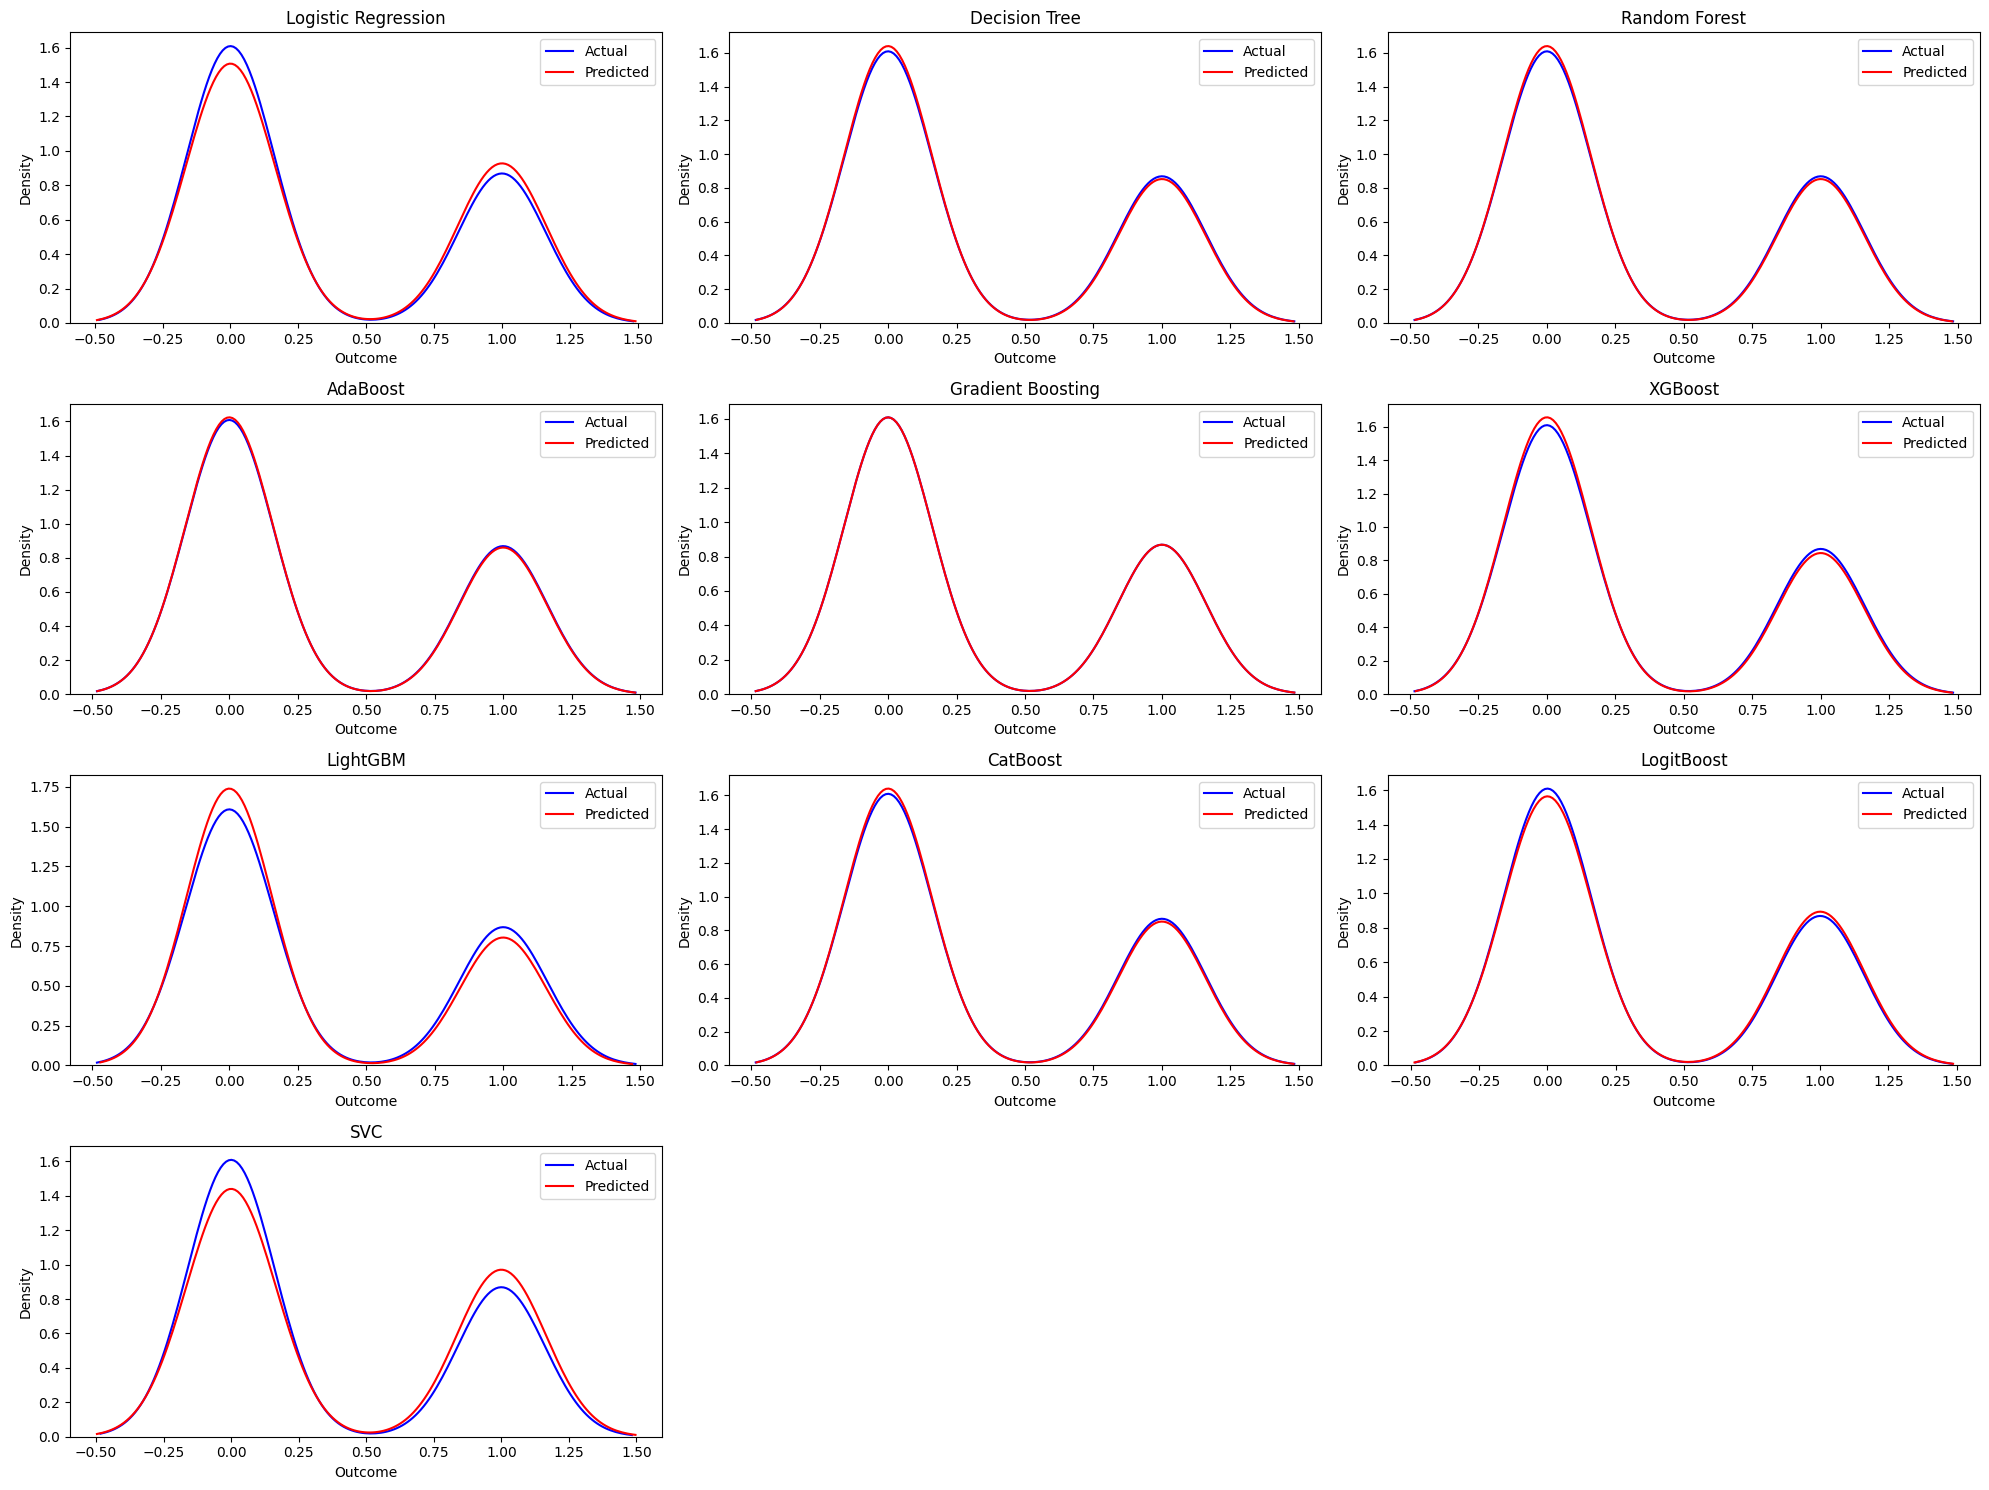

In [ ]:
# Create a 4x3 grid to accommodate 10 models
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

# Flatten the axes array for easy indexing
ax = ax.flatten()

model_names = list(models.keys())

# Loop through each model and plot the actual vs. predicted distributions
for i, name in enumerate(model_names):
    sns.kdeplot(y_test, ax=ax[i], label='Actual', color='blue')
    sns.kdeplot(predictions[name], ax=ax[i], label='Predicted', color='red')
    ax[i].set_title(name)
    ax[i].legend()

# Hide any unused subplots (since we only have 10 models but a 12 subplot grid)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

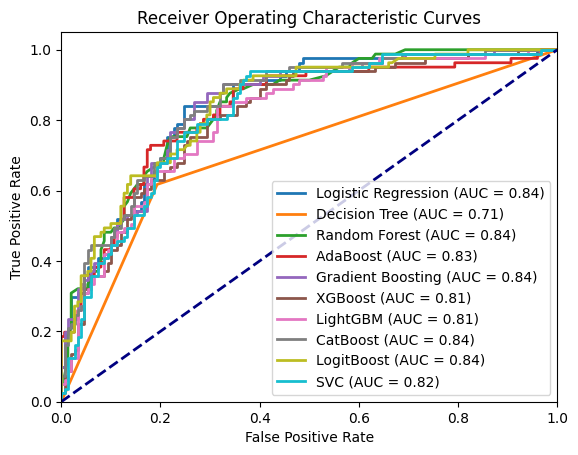

In [ ]:
# Loop over models and plot ROC curves
for name, model in models.items():
    # Predict probabilities (for ROC curve we need the probabilities, not the binary predictions)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()

##6.Conclusion

The exploratory data analysis reveals several key insights into the factors associated with diabetes:

**Most Significant Predictors**

- **Glucose** is the most significant predictor of diabetes, showing the highest positive correlation with the Outcome variable (0.47). Higher glucose levels are strongly associated with an increased likelihood of diabetes.
- **BMI (0.29)**, **Age (0.24)**, and **Pregnancies (0.22)** also have positive correlations with diabetes. Individuals with higher BMI, older age, or more pregnancies are at a greater risk of diabetes, although these correlations are weaker than that of glucose.

**Moderately Significant**

- **Diabetes Pedigree Function (0.17)** has some predictive power but is less significant compared to glucose, BMI, age, and pregnancies. This function measures the hereditary influence of diabetes, and higher values are more common among individuals with diabetes.

**Low Significance**

- **Insulin (0.13)**, **Skin Thickness (0.07)**, and **Blood Pressure (0.07)** show very low correlations with the Outcome variable. While there are slight tendencies for individuals with diabetes to have higher levels in these measures, they contribute minimally to predicting diabetes in this dataset.

**Inter-Feature Correlations**

- **Age and Pregnancies (0.54)** are strongly correlated, indicating that older individuals tend to have had more pregnancies.
- **Glucose and Insulin (0.33)** are moderately correlated, as both are related to blood sugar regulation.
- **Skin Thickness and Insulin (0.44)** also have a moderate correlation, likely due to their relationship with body fat and metabolism.

**Dataset Imbalance**

- The dataset is somewhat imbalanced, with the majority class being **No Diabetes (0)**, representing approximately 65.1% of the data, and the minority class being **Diabetes (1)**, accounting for about 34.9%. This imbalance can impact the performance of machine learning models, making them biased towards the majority class.

**Pregnancies**

- As the number of pregnancies increases, the proportion of individuals with diabetes also increases, particularly for those with 7 or more pregnancies. The median number of pregnancies is higher for individuals with diabetes.

**Glucose**

- Glucose levels are a strong indicator of diabetes. Higher glucose levels are predominantly associated with diabetic individuals, with a noticeable shift in the distribution and median towards higher values in the diabetic group.

**BloodPressure**

- Blood pressure has a slight association with diabetes. While there is a tendency for individuals with diabetes to have higher blood pressure levels, the significant overlap with non-diabetic individuals suggests that blood pressure alone is not a strong predictor.

**SkinThickness**

- Skin thickness shows minimal differentiation between diabetic and non-diabetic individuals. Although individuals with diabetes tend to have slightly higher skin thickness, the overlap is significant, indicating that it is not a strong predictor.

**Insulin**

- Insulin levels are more varied among diabetic individuals, with higher levels being more common. However, like skin thickness, the overlap between groups suggests that insulin alone is not a definitive predictor.

**BMI**

- Higher BMI values are more common among individuals with diabetes. The shift towards higher BMI values in the diabetic group, along with a higher median BMI, indicates that BMI is associated with an increased risk of diabetes.

**DiabetesPedigreeFunction**

- Higher values of Diabetes Pedigree Function are more common among individuals with diabetes, though this predictor is weaker compared to others like glucose and BMI.

**Age**

- Age is a significant factor, with older individuals being more likely to develop diabetes. The distribution of diabetic individuals skews towards older ages, with a higher median age compared to those without diabetes.

Therefore, the most significant predictors of diabetes in this dataset are glucose levels, BMI, age, and the number of pregnancies. While other factors like blood pressure, skin thickness, insulin levels, and Diabetes Pedigree Function do contribute to the risk, their predictive power is much lower. Given the dataset's imbalance, careful consideration is needed when applying machine learning models, as the imbalance may lead to models that are biased towards the majority class. Ultimately, glucose levels stand out as the strongest single predictor of diabetes, with BMI, age, and pregnancies also playing important roles.


The **AdaBoost** model consistently performs at or near the top across all metrics (accuracy, precision, recall, and F1 score). It has the highest accuracy, precision, and F1 score, and it is tied for the highest recall. Therefore, **AdaBoost** can be considered the best model for predicting diabetes in this dataset, as it provides a good balance between correctly identifying positive cases (diabetes) and minimizing false positives.